### IMPORT THE PACKAGES AND DATASETS

In [1]:
# IMPORT THE PACKAGES

import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1) BOOKS DATASET

In [2]:
books = pd.read_csv("D:\PROJECT\Books.csv", encoding='latin1',low_memory=False)
books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

###  EDA

In [3]:
books.describe()

ISBN      Book-Title      Book-Author Year-Of-Publication  \
count       271360          271360           271359              271360   
unique      271360          242135           102023                 118   
top     0195153448  Selected Poems  Agatha Christie                2002   
freq             1              27              632               17627   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq                                                    2   

                                              Image-URL-L  
count                                              271357  
unique                                             271041  
top     http://images.amazon.com/images/P/225307649X.0...  
freq                                                    2

In [4]:
books.shape

(271360, 8)

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
list(books)

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L']

In [7]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
# Fill null values with '0'

books.fillna(0, inplace=True)

In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [11]:
# Export the filtered dataset to files
# Books = df.to_csv("D:\Project Datasets\Books.csv",index=False)

#Books = pd.DataFrame(df)

### IMPORT THE CLEANED BOOKS DATASET WITHOUT OUTLIERS 

In [12]:
# Import cleaned dataset
df1 = pd.read_csv("D:\PROJECT\Books.csv",encoding = 'latin1',low_memory=False)
df1

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

In [13]:
df1.shape

(271360, 8)

### 2) RATINGS DATASET

In [14]:
ratings = pd.read_csv("D:\PROJECT\Ratings.csv", encoding='latin1')
df2 = ratings
df2

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

In [15]:
ratings.shape

(1149780, 3)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [17]:
df2.describe()

User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01

In [18]:
df2.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [19]:
df2.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### 3) USERS DATASET

In [20]:
df3 = pd.read_csv("D:/PROJECT/Users.csv",encoding='latin1', dtype={'Column_Name': 'str'})
df3

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

In [21]:
df3.shape

(278858, 3)

In [22]:
df3.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [23]:
df3.describe()

User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000

In [24]:
df3.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

### USERS WITH ONLY AGE FROM  '10' TO '100'  YEARS

In [25]:
users_clean = df3.loc[(df3.Age > 10) & (df3.Age < 100) | (pd.isnull(df3.Age))]

In [26]:
users_clean

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[277332 rows x 3 columns]

In [27]:
df4 = users_clean

In [28]:
df4["Age"].isnull().sum()

110762

In [29]:
df4["Age"].mean()

34.78687638830522

In [30]:
df4["Age"].median()

32.0

In [31]:
df4["Age"].mode()

0    24.0
Name: Age, dtype: float64

In [32]:
df4["Age"].isnull().sum()

110762

In [33]:
df4_copy = df4.copy()

df4_copy["Age"].fillna(df4["Age"].median(), inplace=True)

In [34]:
sorted(df4_copy.Age.unique())

[11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0]

In [35]:
len(df4_copy.Age.unique())

89

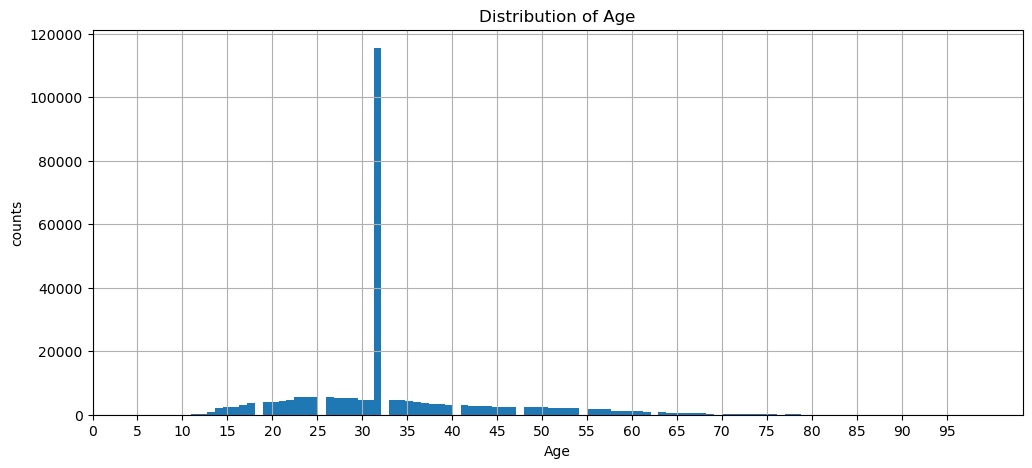

In [36]:
# First create a histogram of the Age field

ax = df4_copy.Age.hist(bins=100, figsize=(12,5))
ax.set_title("Distribution of Age")
ax.set_xlabel("Age")
ax.set_ylabel("counts")
ax.set_xticks(range(0,100,5))
plt.show()

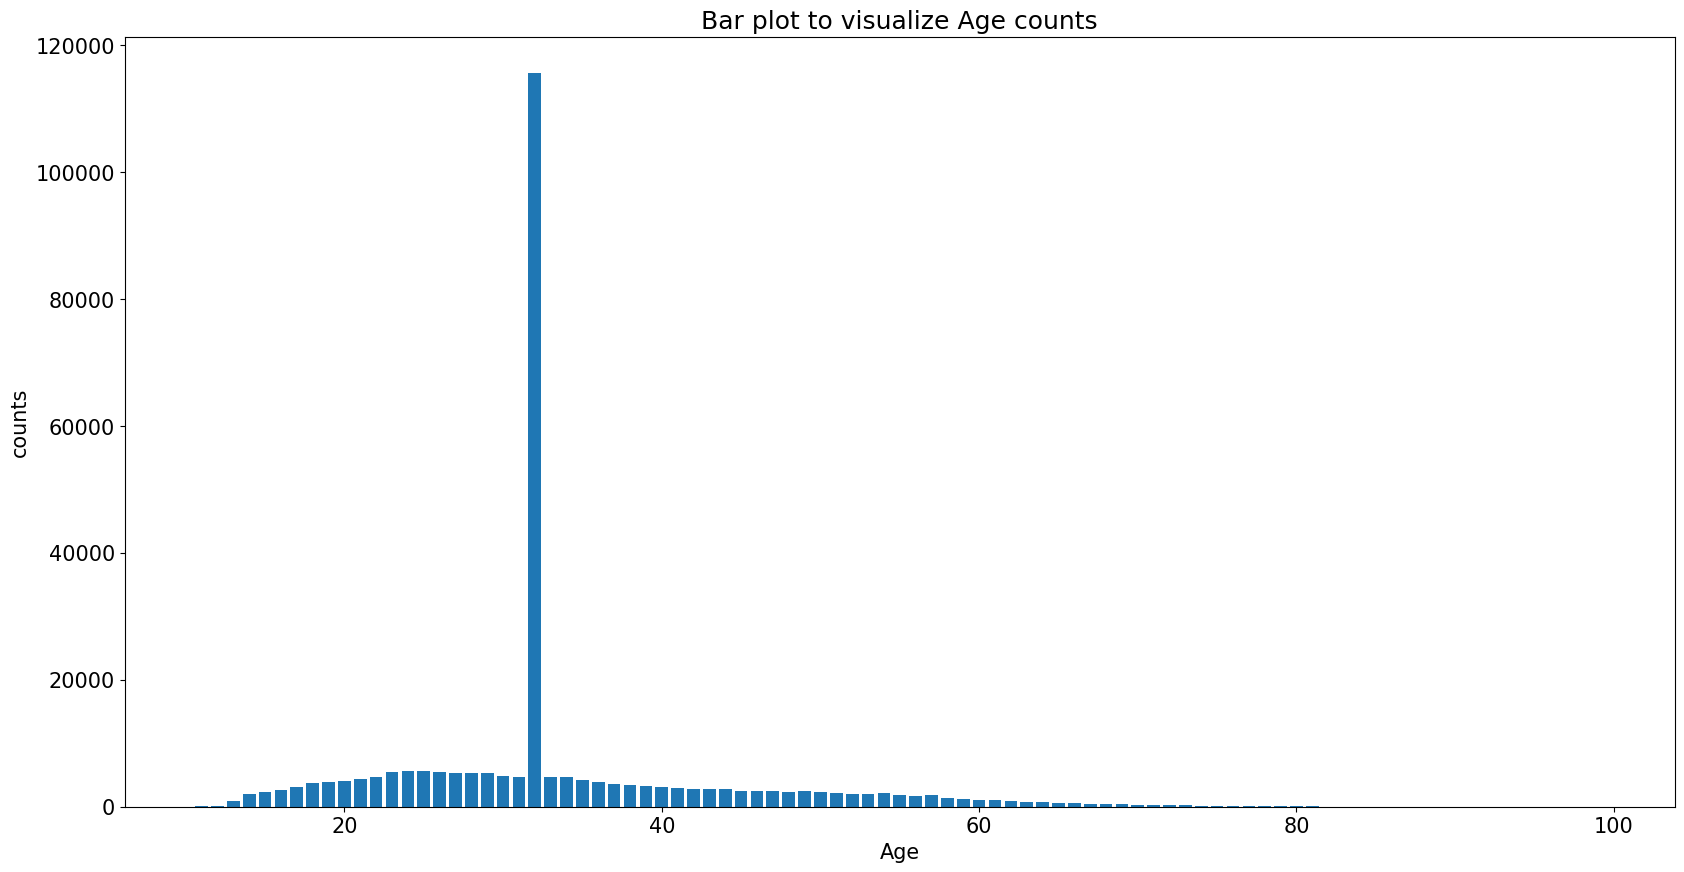

In [37]:
# Bar plot to visualize Age counts.

u = df4_copy.Age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 15})
plt.bar(u.index, u.values)
plt.title('Bar plot to visualize Age counts')
plt.xlabel("Age")
plt.ylabel("counts")
plt.show()

In [38]:
df4_copy = pd.DataFrame(df4_copy)

In [39]:
list(df4_copy)

['User-ID', 'Location', 'Age']

In [40]:
df1.shape

(271360, 8)

In [41]:
df2.shape

(1149780, 3)

In [42]:
df4_copy.shape

(277332, 3)

In [43]:
list(df1)

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L']

In [44]:
list(df2)

['User-ID', 'ISBN', 'Book-Rating']

In [45]:
list(df4_copy)

['User-ID', 'Location', 'Age']

In [46]:
# merge the 3 datasets into a single dataset

merged_df = pd.merge(df1,df2, on='ISBN', how='inner')
merged_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
User-ID                0
Book-Rating            0
dtype: int64

In [47]:
merged_df.shape

(1031136, 10)

In [48]:
merged_df.head()

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   
3  0002005018         Clara Callan  Richard Bruce Wright                2001   
4  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   
3  http://images.amazon.com/images/P/0002005018.0...   
4  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  User-ID  Book-Rating  
0  http://images.amazon.com/images/P/0195153448.0...        2            0  
1  http://images.amazon.com/images/P/0002005018.0...        8            5  
2  http://images.amazon.com/images/P/0002005018.0...    11400            0  
3  http://images.amazon.com/images/P/0002005018.0...    11676            8  
4  http://images.amazon.com/images/P/0002005018.0...    41385            0

In [49]:
list(merged_df)

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L',
 'User-ID',
 'Book-Rating']

### MERGE ALL THE 3 DATASETS INTO A SINGLE DATASET FOR FURTHER ANALYSIS
### MERGED_DATA

In [50]:
merged_data = pd.merge(merged_df,df4_copy, on='User-ID',how='inner')
merged_data

ISBN                                         Book-Title  \
0        0195153448                                Classical Mythology   
1        0002005018                                       Clara Callan   
2        0060973129                               Decision in Normandy   
3        0374157065  Flu: The Story of the Great Influenza Pandemic...   
4        0393045218                             The Mummies of Urumchi   
...             ...                                                ...   
1023235  087004124X                                             Anthem   
1023236  158243123X                               A Student of Weather   
1023237  8485900057            Rimas y leyendas (ClÃ¡sicos Fraile ; 3)   
1023238  0838934854                   Anglo-American Cataloguing Rules   
1023239  3423300965                                   Texte zur Ethik.   

                     Book-Author Year-Of-Publication  \
0             Mark P. O. Morford                2002   
1           Richard Bruce Wright                2001   
2                   Carlo D'Este                1991   
3               Gina Bari Kolata                1999   
4                E. J. W. Barber                1999   
...                          ...                 ...   
1023235                 Ayn Rand                1966   
1023236            Elizabeth Hay                2001   
1023237  Gustavo Adolfo BÃ©cquer                1981   
1023238           Michael Gorman                1998   
1023239        Dieter Birnbacher                2003   

                            Publisher  \
0             Oxford University Press   
1               HarperFlamingo Canada   
2                     HarperPerennial   
3                Farrar Straus Giroux   
4          W. W. Norton &amp; Company   
...                               ...   
1023235                  Caxton Press   
1023236            Counterpoint Press   
1023237              Ediciones Fraile   
1023238  American Library Association   
1023239                           Dtv   

                                               Image-URL-S  \
0        http://images.amazon.com/images/P/0195153448.0...   
1        http://images.amazon.com/images/P/0002005018.0...   
2        http://images.amazon.com/images/P/0060973129.0...   
3        http://images.amazon.com/images/P/0374157065.0...   
4        http://images.amazon.com/images/P/0393045218.0...   
...                                                    ...   
1023235  http://images.amazon.com/images/P/087004124X.0...   
1023236  http://images.amazon.com/images/P/158243123X.0...   
1023237  http://images.amazon.com/images/P/8485900057.0...   
1023238  http://images.amazon.com/images/P/0838934854.0...   
1023239  http://images.amazon.com/images/P/3423300965.0...   

                                               Image-URL-M  \
0        http://images.amazon.com/images/P/0195153448.0...   
1        http://images.amazon.com/images/P/0002005018.0...   
2        http://images.amazon.com/images/P/0060973129.0...   
3        http://images.amazon.com/images/P/0374157065.0...   
4        http://images.amazon.com/images/P/0393045218.0...   
...                                                    ...   
1023235  http://images.amazon.com/images/P/087004124X.0...   
1023236  http://images.amazon.com/images/P/158243123X.0...   
1023237  http://images.amazon.com/images/P/8485900057.0...   
1023238  http://images.amazon.com/images/P/0838934854.0...   
1023239  http://images.amazon.com/images/P/3423300965.0...   

                                               Image-URL-L  User-ID  \
0        http://images.amazon.com/images/P/0195153448.0...        2   
1        http://images.amazon.com/images/P/0002005018.0...        8   
2        http://images.amazon.com/images/P/0060973129.0...        8   
3        http://images.amazon.com/images/P/0374157065.0...        8   
4        http://images.amazon.com/images/P/0393045218.0...        8   
...                                         

### EDA FOR THE MERGED DATASET

In [51]:
merged_data.shape

(1023240, 12)

In [52]:
list(merged_data)

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L',
 'User-ID',
 'Book-Rating',
 'Location',
 'Age']

In [53]:
merged_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

In [54]:
merged_data.fillna(0,inplace=True)

In [55]:
merged_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

In [56]:
merged_data.duplicated().sum()

0

In [57]:
merged_data.shape

(1023240, 12)

In [58]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023240 entries, 0 to 1023239
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1023240 non-null  object 
 1   Book-Title           1023240 non-null  object 
 2   Book-Author          1023240 non-null  object 
 3   Year-Of-Publication  1023240 non-null  object 
 4   Publisher            1023240 non-null  object 
 5   Image-URL-S          1023240 non-null  object 
 6   Image-URL-M          1023240 non-null  object 
 7   Image-URL-L          1023240 non-null  object 
 8   User-ID              1023240 non-null  int64  
 9   Book-Rating          1023240 non-null  int64  
 10  Location             1023240 non-null  object 
 11  Age                  1023240 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 101.5+ MB


In [59]:
merged_data.describe()

User-ID   Book-Rating           Age
count  1.023240e+06  1.023240e+06  1.023240e+06
mean   1.403235e+05  2.842483e+00  3.577733e+01
std    8.038123e+04  3.855473e+00  1.047635e+01
min    2.000000e+00  0.000000e+00  1.100000e+01
25%    7.018300e+04  0.000000e+00  3.100000e+01
50%    1.406620e+05  0.000000e+00  3.200000e+01
75%    2.108380e+05  7.000000e+00  4.100000e+01
max    2.788540e+05  1.000000e+01  9.900000e+01

In [60]:
merged_data.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  User-ID  Book-Rating  \
0  http://images.amazon.com/images/P/0195153448.0...        2            0   
1  http://images.amazon.com/images/P/0002005018.0...        8            5   
2  http://images.amazon.com/images/P/0060973129.0...        8            0   
3  http://images.amazon.com/images/P/0374157065.0...        8            0   
4  http://images.amazon.com/images/P/0393045218.0...        8            0   

                    Location   Age  
0  stockton, california, usa  18.0  
1   timmins, ontario, canada  32.0  
2   timmins, ontario, canada  32.0  
3   timmins, ontario, canada  32.0  
4   timmins, ontario, canada  32.0

In [61]:
list(merged_data)

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L',
 'User-ID',
 'Book-Rating',
 'Location',
 'Age']

In [62]:
merged_data.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

In [63]:
merged_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

In [64]:
merged_data["Book-Rating"].max()

10

In [65]:
merged_data.duplicated().sum()

0

In [66]:
print(merged_data[(merged_data["Book-Author"] == "John Grisham") & (merged_data["Book-Title"] == "A Painted House")]["Image-URL-M"])


188        http://images.amazon.com/images/P/044023722X.0...
19528      http://images.amazon.com/images/P/044023722X.0...
22830      http://images.amazon.com/images/P/044023722X.0...
28749      http://images.amazon.com/images/P/044023722X.0...
33094      http://images.amazon.com/images/P/044023722X.0...
                                 ...                        
719469     http://images.amazon.com/images/P/044023722X.0...
719474     http://images.amazon.com/images/P/044023722X.0...
1000580    http://images.amazon.com/images/P/044023722X.0...
1019655    http://images.amazon.com/images/P/0553712527.0...
1019656    http://images.amazon.com/images/P/0553712527.0...
Name: Image-URL-M, Length: 648, dtype: object


In [67]:
merged_data["Image-URL-M"][1019656]

'http://images.amazon.com/images/P/0553712527.01.MZZZZZZZ.jpg'

In [68]:
merged_data[merged_data["Image-URL-M"] == 'A Painted House']


Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L, User-ID, Book-Rating, Location, Age]
Index: []

#### FIND THE TEXT DATA AND CONVERT TO NUMERIC.

In [69]:
import pandas as pd

# Sample DataFrame
data = merged_data['ISBN']
df = pd.DataFrame(data)

# Display rows with non-numeric characters in the ISBN column
non_numeric_isbn = df[~df['ISBN'].str.isdigit()]
print("Rows with non-numeric characters in the ISBN column:")
print(non_numeric_isbn)

# Remove non-numeric characters from ISBN column and add cleaned values back to existing column
merged_data['ISBN'] = merged_data['ISBN'].str.replace(r'\D', '')

# Convert ISBN column to numeric
merged_data['ISBN'] = pd.to_numeric(merged_data['ISBN'], errors='coerce')

# Display DataFrame after removing non-numeric characters and adding cleaned values back to existing column
print("\nDataFrame after removing non-numeric characters:")
print(merged_data)


Rows with non-numeric characters in the ISBN column:
               ISBN
9        074322678X
11       080652121X
51       067166641X
74       074341134X
98       042518630X
...             ...
1023186  002079262X
1023220  051758977X
1023222  345386431X
1023235  087004124X
1023236  158243123X

[84735 rows x 1 columns]

DataFrame after removing non-numeric characters:
               ISBN                                         Book-Title  \
0         195153448                                Classical Mythology   
1           2005018                                       Clara Callan   
2          60973129                               Decision in Normandy   
3         374157065  Flu: The Story of the Great Influenza Pandemic...   
4         393045218                             The Mummies of Urumchi   
...             ...                                                ...   
1023235    87004124                                             Anthem   
1023236   158243123                    

In [70]:
# Check if there are any non-numeric values in the ISBN column
non_numeric_values_exist = not merged_data['ISBN'].apply(lambda x: str(x).isdigit()).all()

if non_numeric_values_exist:
    print("Non-numeric values still exist in the ISBN column.")
else:
    print("All values in the ISBN column are numeric.")

All values in the ISBN column are numeric.


In [71]:
merged_data.dtypes

ISBN                     int64
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

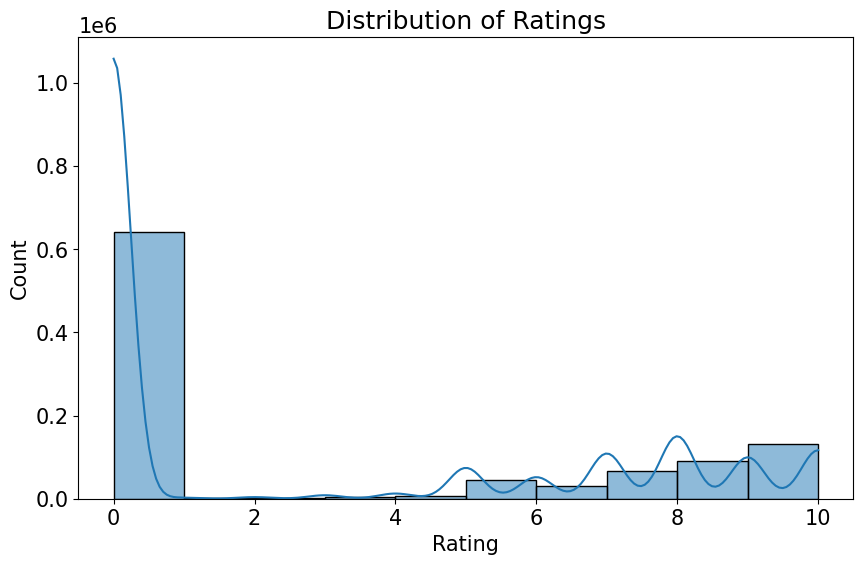

In [72]:
# VISUALIZE THE DATA DISTRIBUTION 

plt.figure(figsize=(10,6))
sns.histplot(merged_data['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [73]:
# User Analysis
# Number of interactions per user
user_interactions = merged_data.groupby('User-ID').size()
print("\nNumber of Interactions per User:")
user_interactions


Number of Interactions per User:


User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Length: 91587, dtype: int64

In [74]:
print(user_interactions.describe())

count    91587.000000
mean        11.172328
std         88.674637
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max      11144.000000
dtype: float64


In [75]:
user_interactions.shape

(91587,)

In [76]:
merged_data["User-ID"].describe()

count    1.023240e+06
mean     1.403235e+05
std      8.038123e+04
min      2.000000e+00
25%      7.018300e+04
50%      1.406620e+05
75%      2.108380e+05
max      2.788540e+05
Name: User-ID, dtype: float64

In [77]:
user_interactions.isnull().sum()

0

In [78]:
# Item Analysis
# Number of interactions per book

book_interactions = merged_data.groupby('ISBN').size()
print("\nNumber of Interactions per Book:")
print(book_interactions.describe())


Number of Interactions per Book:
count    268521.000000
mean          3.810652
std          13.779493
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2492.000000
dtype: float64


In [79]:
book_interactions

ISBN
0               5
1               9
4               1
5               1
6               6
               ..
9999984584      1
9999991556      1
9999999999      1
34422480273     2
351836547990    1
Length: 268521, dtype: int64

In [80]:
book_interactions.shape

(268521,)

In [81]:
book_interactions.info()

<class 'pandas.core.series.Series'>
Int64Index: 268521 entries, 0 to 351836547990
Series name: None
Non-Null Count   Dtype
--------------   -----
268521 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB


In [82]:
# Interaction Analysis
# Interactions over time (e.g., yearly trends)

merged_data['Year-Of-Publication'] = pd.to_numeric(merged_data['Year-Of-Publication'], errors='coerce')  # Convert to numeric

In [83]:
merged_data["Year-Of-Publication"]

0          2002.0
1          2001.0
2          1991.0
3          1999.0
4          1999.0
            ...  
1023235    1966.0
1023236    2001.0
1023237    1981.0
1023238    1998.0
1023239    2003.0
Name: Year-Of-Publication, Length: 1023240, dtype: float64

In [84]:
merged_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    4
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

In [85]:
merged_data.fillna(0, inplace=True)

In [86]:
merged_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

In [87]:
merged_data["Year-Of-Publication"].unique().sum()

224426.0

In [88]:
list(merged_data)

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L',
 'User-ID',
 'Book-Rating',
 'Location',
 'Age']

In [89]:
merged_data.dtypes

ISBN                     int64
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

In [90]:
book_ratings = merged_data.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count'])

# 5. Sort and Select Top Books
top_books = book_ratings.sort_values(by='mean', ascending=False).head(10)
print("Top 10 Books based on Ratings:")
print(top_books)

Top 10 Books based on Ratings:
                                                    mean  count
Book-Title                                                     
Millennium Cookbook: Extraordinary Vegetarian C...  10.0      1
The Totally Pies Cookbook (Totally Cookbooks)       10.0      1
The Totally Nuts Cookbook (Totally Cookbooks)       10.0      1
The Totally Mushroom Cookbook (Totally Cookbooks)   10.0      1
The Totally Lemons Cookbook (Totally Cookbooks)     10.0      1
The Totally Eggplant Cookbook (Totally Cookbooks)   10.0      1
Any Man So Daring                                   10.0      1
The Totally Cookies Cookbook (Totally Cookbooks)    10.0      1
The Totally Carrots Cookbook                        10.0      1
The Totally Camping Cookbook (Totally Cookbooks)    10.0      1


In [91]:
merged_data[["Book-Title", "Book-Rating"]][(merged_data["Book-Rating"] >= 1) & (merged_data["Book-Rating"] <= 10)]

Book-Title  Book-Rating
1                                             Clara Callan            5
9                  Where You'll Find Me: And Other Stories            5
12                                      The Middle Stories            5
13                                                Jane Doe            5
15            The Witchfinder (Amos Walker Mystery Series)            6
...                                                    ...          ...
1023233  Sobre La Utilidad y Los Perjuicios de La Historia            6
1023235                                             Anthem            8
1023236                               A Student of Weather            8
1023237            Rimas y leyendas (ClÃ¡sicos Fraile ; 3)           10
1023238                   Anglo-American Cataloguing Rules            6

[381314 rows x 2 columns]

In [92]:
 merged_data[["Book-Title", "Book-Rating"]][(merged_data["Book-Rating"] > 5) & (merged_data["Book-Rating"] < 6)]

Empty DataFrame
Columns: [Book-Title, Book-Rating]
Index: []

In [93]:
# Selecting rows where the book title starts with 'Harry'

harry_books = merged_data[merged_data['Book-Title'].str.startswith('Harry')]

# Checking if there are any books with ratings between 5 and 6 among the selected Harry books
if harry_books[(harry_books["Book-Rating"] > 5) & (harry_books["Book-Rating"] < 7)].shape[0] > 0:
    print(harry_books["Book-Title"])  # Print book titles if found
else:
    print("No books with ratings between 5 and 7 among Harry books.")


733        Harry Potter and the Sorcerer's Stone (Harry P...
865           Harry Potter and the Sorcerer's Stone (Book 1)
1017        Harry Potter and the Chamber of Secrets (Book 2)
1107       Harry Potter and the Prisoner of Azkaban (Book 3)
1442            Harry Potter and the Goblet of Fire (Book 4)
                                 ...                        
1014584    Harry Potter et l'Ordre du PhÃ©nix (Harry Pott...
1015034                                       Harry McCreedy
1015189                     Harry Potter Y LA Camara Secreta
1021923                Harry Potter and the Sorcerer's Stone
1022894                Harry Potter and the Sorcerer's Stone
Name: Book-Title, Length: 3030, dtype: object


###  VISUALIZATIONS 

In [94]:
# ISBN

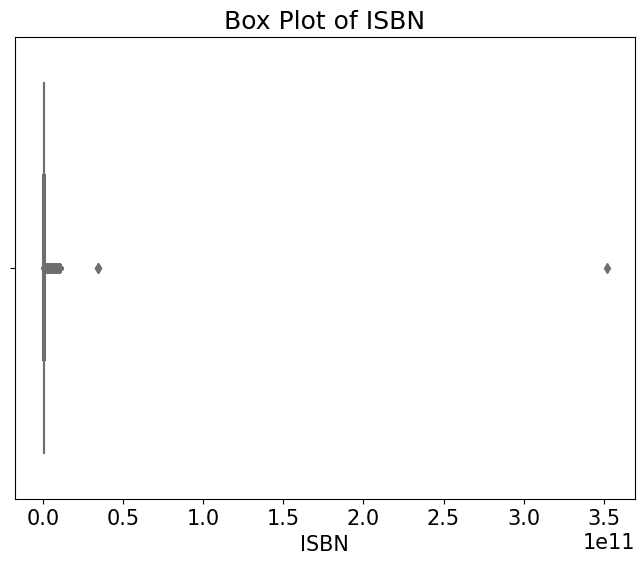

In [95]:
# BOX PLOT FOR ISBN COLUMN WITH OUTLIERS

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['ISBN'], color='skyblue')
plt.title('Box Plot of ISBN')
plt.xlabel('ISBN')
plt.show()

In [96]:
#AGE

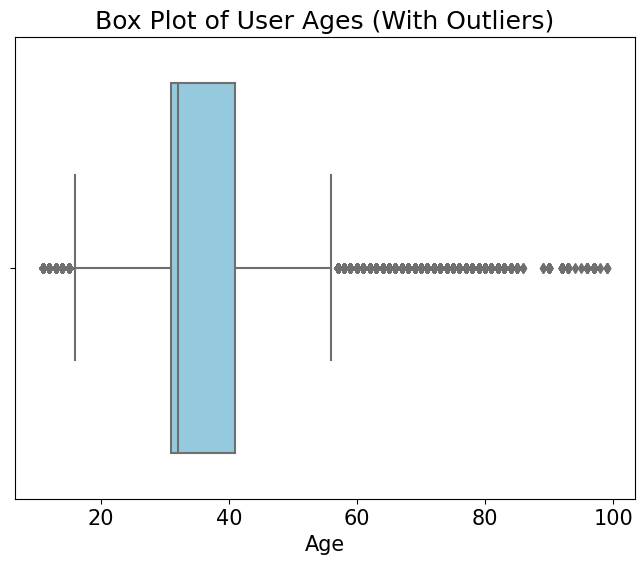

In [97]:
# BOX PLOT FOR AGE COLUMN WITH OUTLIERS

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['Age'], color='skyblue')
plt.title('Box Plot of User Ages (With Outliers)')
plt.xlabel('Age')
plt.show()

In [98]:
#YEAR OF PUBLICATION

<function matplotlib.pyplot.show(close=None, block=None)>

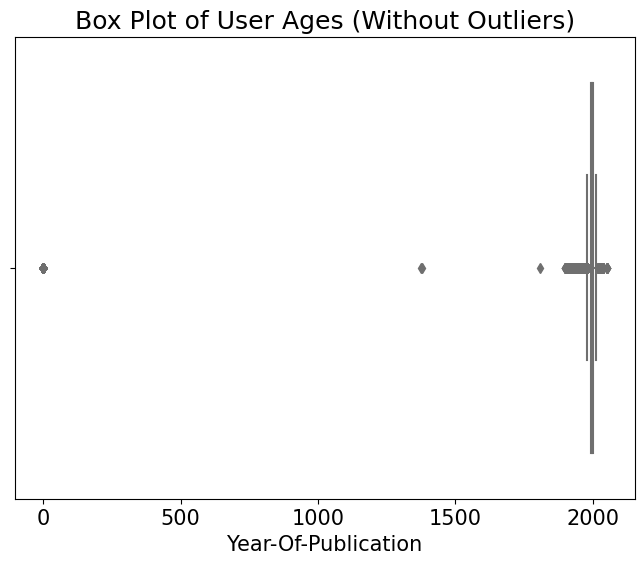

In [99]:
# BOX PLOT FOR YEAR-OF-PUBLICATIONS COLUMN WITHOUT OUTLIERS

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['Year-Of-Publication'], color='skyblue')
plt.title('Box Plot of User Ages (Without Outliers)')
plt.xlabel('Year-Of-Publication')
plt.show

In [100]:
# User-ID

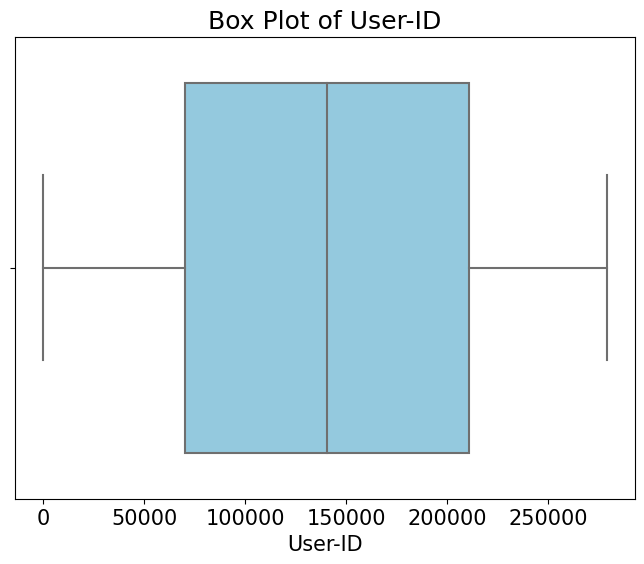

In [101]:
# BOX PLOT FOR USER-ID COLUMN WITH OUTLIERS.

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['User-ID'], color='skyblue')
plt.title('Box Plot of User-ID')
plt.xlabel('User-ID')
plt.show()

In [102]:
# BOOK-RATING

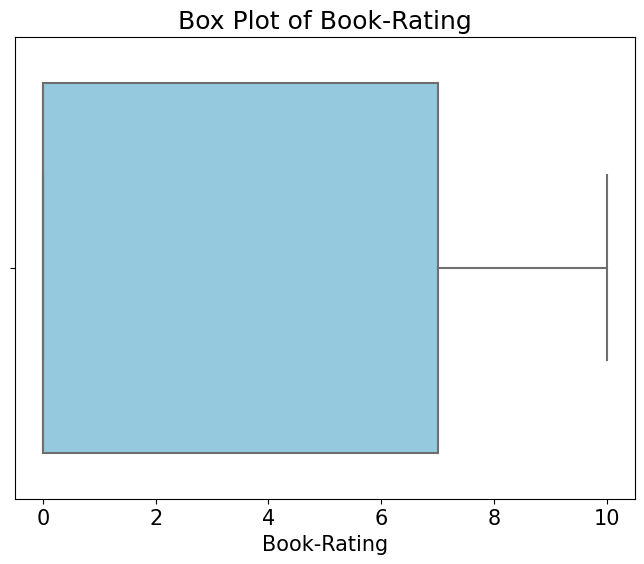

In [103]:
# BOX PLOT FOR BOOK-RATING COLUMN WITH OUTLIERS

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['Book-Rating'], color='skyblue')
plt.title('Box Plot of Book-Rating')
plt.xlabel('Book-Rating')
plt.show()

###  FIND THE OUTLIERS IN THE NUMERIC COLUMNS.

In [104]:
numerical_columns = ['Year-Of-Publication', 'User-ID', 'Book-Rating', 'Age', 'ISBN']

# Dictionary to store outliers for each column
outliers_dict = {}

# Iterate over each numerical column
for column in numerical_columns:
    # Calculate quartiles
    Q1 = merged_data[column].quantile(0.25)
    Q3 = merged_data[column].quantile(0.75)
    
    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate lower and upper whiskers
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = merged_data[(merged_data[column] < lower_whisker) | (merged_data[column] > upper_whisker)]
    
    # Store outliers in dictionary
    outliers_dict[column] = outliers

# Display outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers Detected in '{column}' column:")
    print(outliers.shape)
    print()


Outliers Detected in 'Year-Of-Publication' column:
(43769, 12)

Outliers Detected in 'User-ID' column:
(0, 12)

Outliers Detected in 'Book-Rating' column:
(0, 12)

Outliers Detected in 'Age' column:
(64014, 12)

Outliers Detected in 'ISBN' column:
(110192, 12)



### REMOVING OUTLIERS FROM THE DATASET.

In [105]:
numerical_columns = ['Year-Of-Publication', 'User-ID', 'Book-Rating', 'Age', 'ISBN']

# Iterate over each numerical column
for column in numerical_columns:
    # Calculate quartiles
    Q1 = merged_data[column].quantile(0.25)
    Q3 = merged_data[column].quantile(0.75)
    
    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate lower and upper whiskers
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    # Select rows that are not outliers for the current column
    merged_data = merged_data[(merged_data[column] >= lower_whisker) & (merged_data[column] <= upper_whisker)]

# Display the resulting DataFrame without outliers
print("DataFrame without outliers:")
print(merged_data)


DataFrame without outliers:
              ISBN                                         Book-Title  \
0        195153448                                Classical Mythology   
1          2005018                                       Clara Callan   
2         60973129                               Decision in Normandy   
3        374157065  Flu: The Story of the Great Influenza Pandemic...   
4        393045218                             The Mummies of Urumchi   
...            ...                                                ...   
1023231  152049266                                         The Window   
1023232  735605289  Managing and Maintaining Microsoft Exchange Se...   
1023234  817310916  One Day in the Life of a Born Again Loser: And...   
1023236  158243123                               A Student of Weather   
1023238  838934854                   Anglo-American Cataloguing Rules   

                           Book-Author  Year-Of-Publication  \
0                   Mark P. O. M

In [106]:
merged_data.shape

(818777, 12)

#### AFTER REMOVING THE OUTLIERS WE GOT "818777" ROWS WITH "12" COLUMNS.

In [107]:
merged_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

#### BOX PLOTS AFTER REMOVING THE OUTLIERS

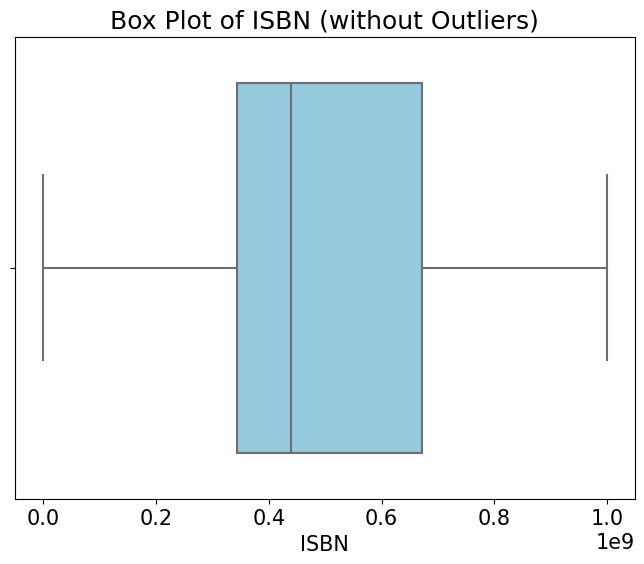

In [108]:
# BOX PLOT FOR ISBN COLUMN WITHOUT OUTLIERS

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['ISBN'], color='skyblue')
plt.title('Box Plot of ISBN (without Outliers)')
plt.xlabel('ISBN')
plt.show()

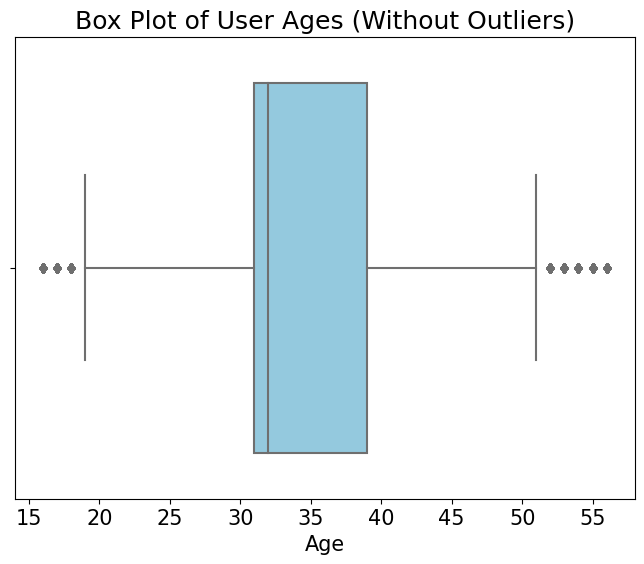

In [109]:
# BOX PLOT FOR AGE COLUMN WITHOUT OUTLIERS 

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['Age'], color='skyblue')
plt.title('Box Plot of User Ages (Without Outliers)')
plt.xlabel('Age')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

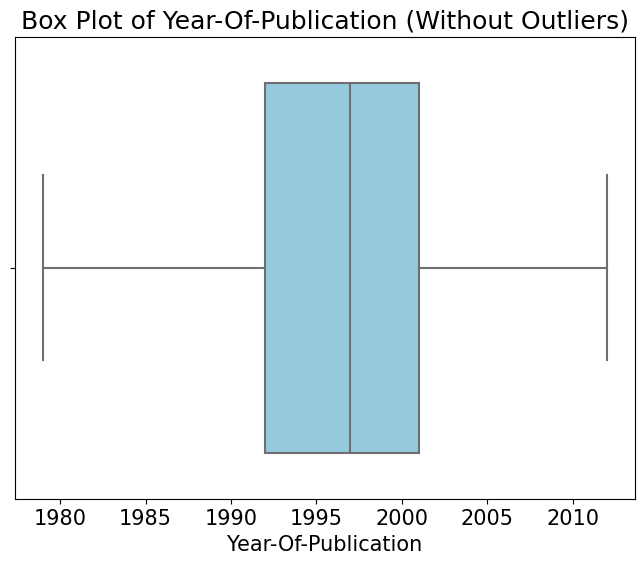

In [110]:
# BOX PLOT FOR YEAR OF PUBLICATION COLUMN WITHOUT OUTLIERS 

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['Year-Of-Publication'], color='skyblue')
plt.title('Box Plot of Year-Of-Publication (Without Outliers)')
plt.xlabel('Year-Of-Publication')
plt.show

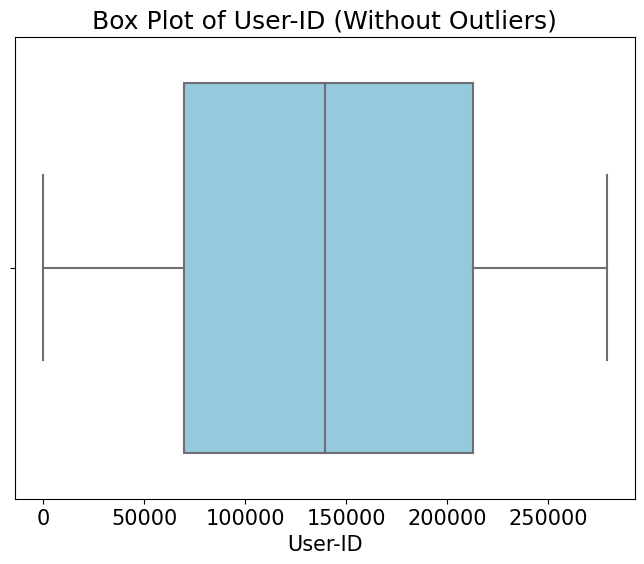

In [111]:
# BOX PLOT FOR USER-ID COLUMN WITHOUT OUTLIERS 

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['User-ID'], color='skyblue')
plt.title('Box Plot of User-ID (Without Outliers)')
plt.xlabel('User-ID')
plt.show()

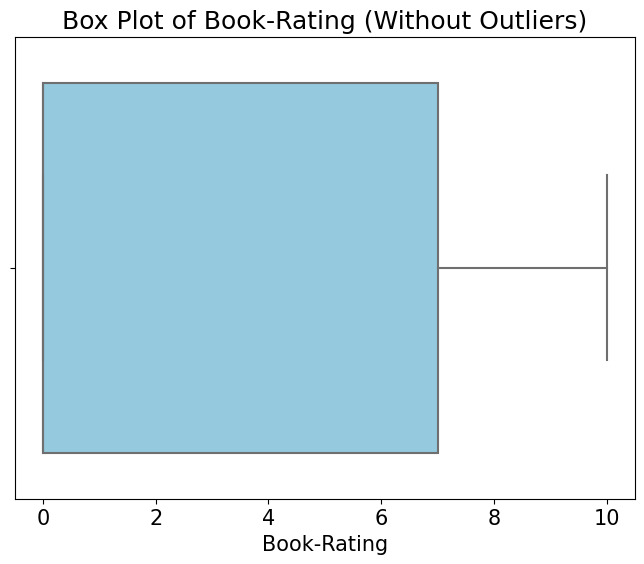

In [112]:
# BOX PLOT FOR BOOK-RATINGS COLUMN WITHOUT OUTLIERS

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['Book-Rating'], color='skyblue')
plt.title('Box Plot of Book-Rating (Without Outliers)')
plt.xlabel('Book-Rating')
plt.show()

In [113]:
merged_data.shape

(818777, 12)

In [114]:
merged_data.duplicated().sum()

0

In [115]:
numerical_columns = pd.DataFrame(numerical_columns)

### VISUALIZATION

array([[<AxesSubplot:title={'center':'ISBN'}>,
        <AxesSubplot:title={'center':'Year-Of-Publication'}>],
       [<AxesSubplot:title={'center':'User-ID'}>,
        <AxesSubplot:title={'center':'Book-Rating'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

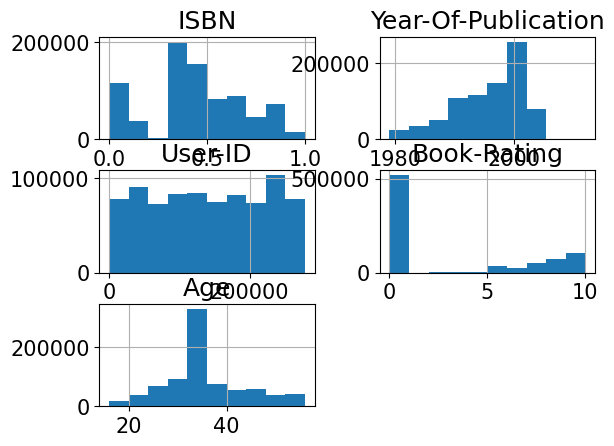

In [116]:
# HISTOGRAM 

merged_data.hist()

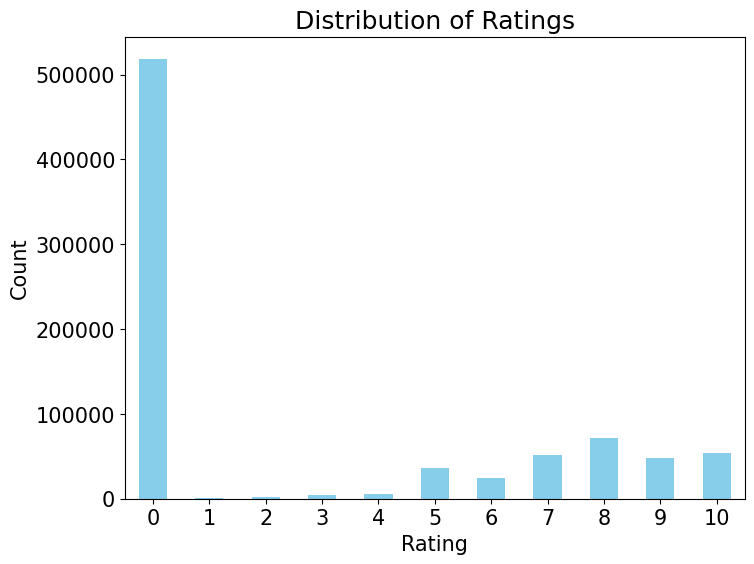

In [117]:
#BAR PLOT FOR DISTRIBUTION OF RATINGS

plt.figure(figsize=(8, 6))
merged_data['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

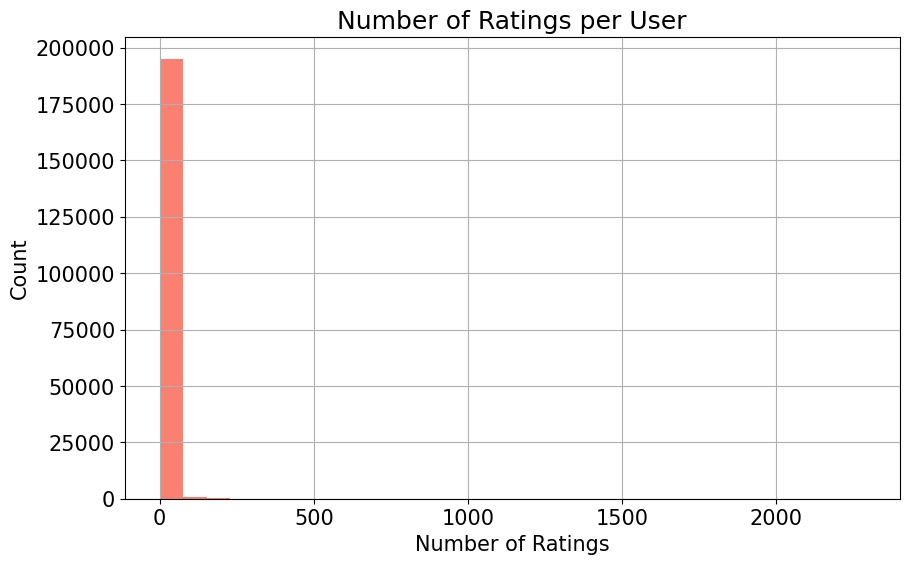

In [118]:
# HISTOGRAM FOR NO OF RATINGS PER USER

plt.figure(figsize=(10, 6))
ratings_per_user = merged_data.groupby('ISBN')['Book-Rating'].count()
ratings_per_user.hist(bins=30, color='salmon')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

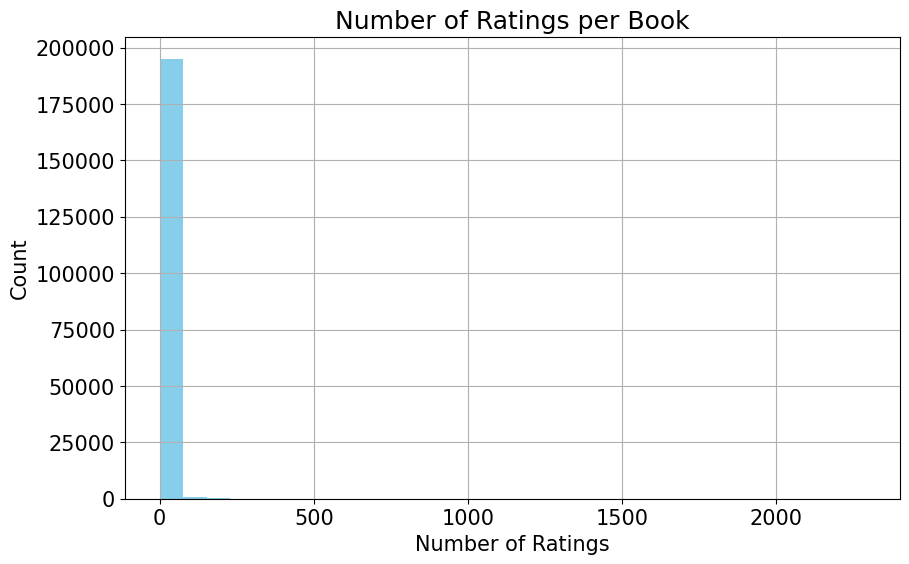

In [119]:
# HISTIGRAM FOR NO OF RATINGS PER BOOK

plt.figure(figsize=(10, 6))
ratings_per_book = merged_data.groupby('ISBN')['Book-Rating'].count()
ratings_per_book.hist(bins=30, color='skyblue')
plt.title('Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

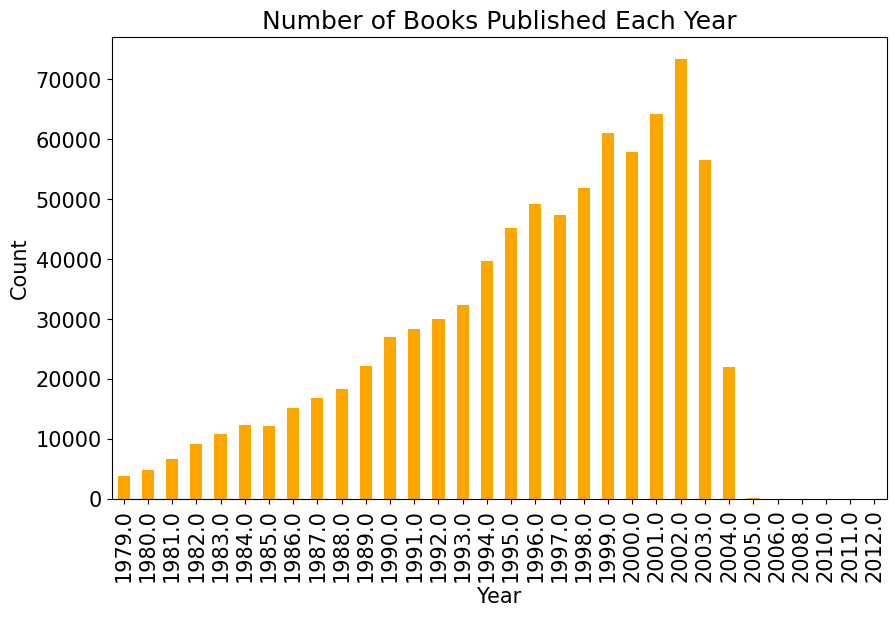

In [120]:
# BAR PLOT FOR NO OF BOOKS PUBLISHED EACH YEAR

plt.figure(figsize=(10, 6))
merged_data['Year-Of-Publication'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Books Published Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

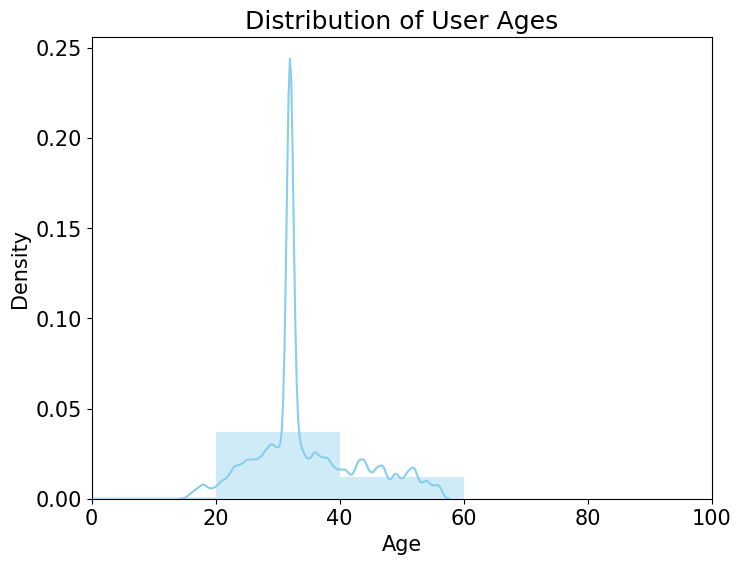

In [121]:
# DISTPLOT OF AGE DISTRIBUTION
age_bins = range(0, 101, 20)

# Plot distribution of ages with custom bins
plt.figure(figsize=(8, 6))
sns.distplot(merged_data['Age'].dropna(), bins=age_bins, kde=True, color='skyblue')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(0, 100)  # Set x-axis limits
plt.show()

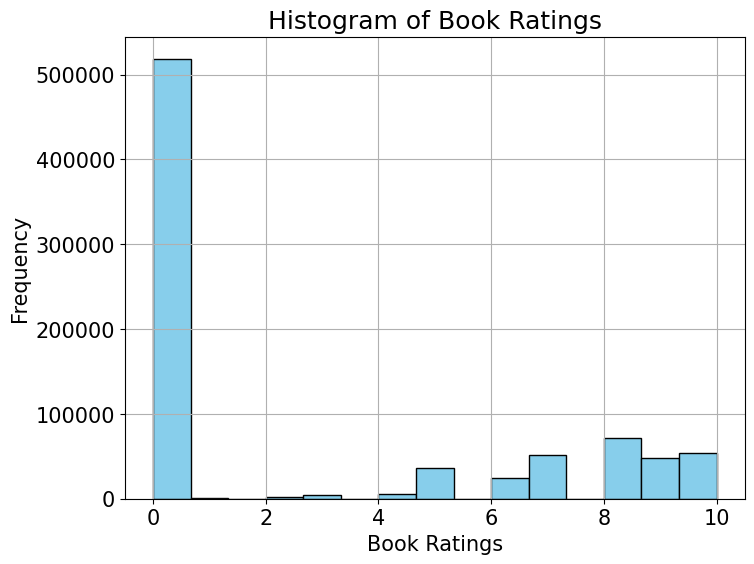

In [122]:
# HISTOGRAM OF BOOK RATINGS.

book_ratings = merged_data['Book-Rating']

plt.figure(figsize=(8, 6))
plt.hist(book_ratings, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Book Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Book Ratings')
plt.grid(True)
plt.show()

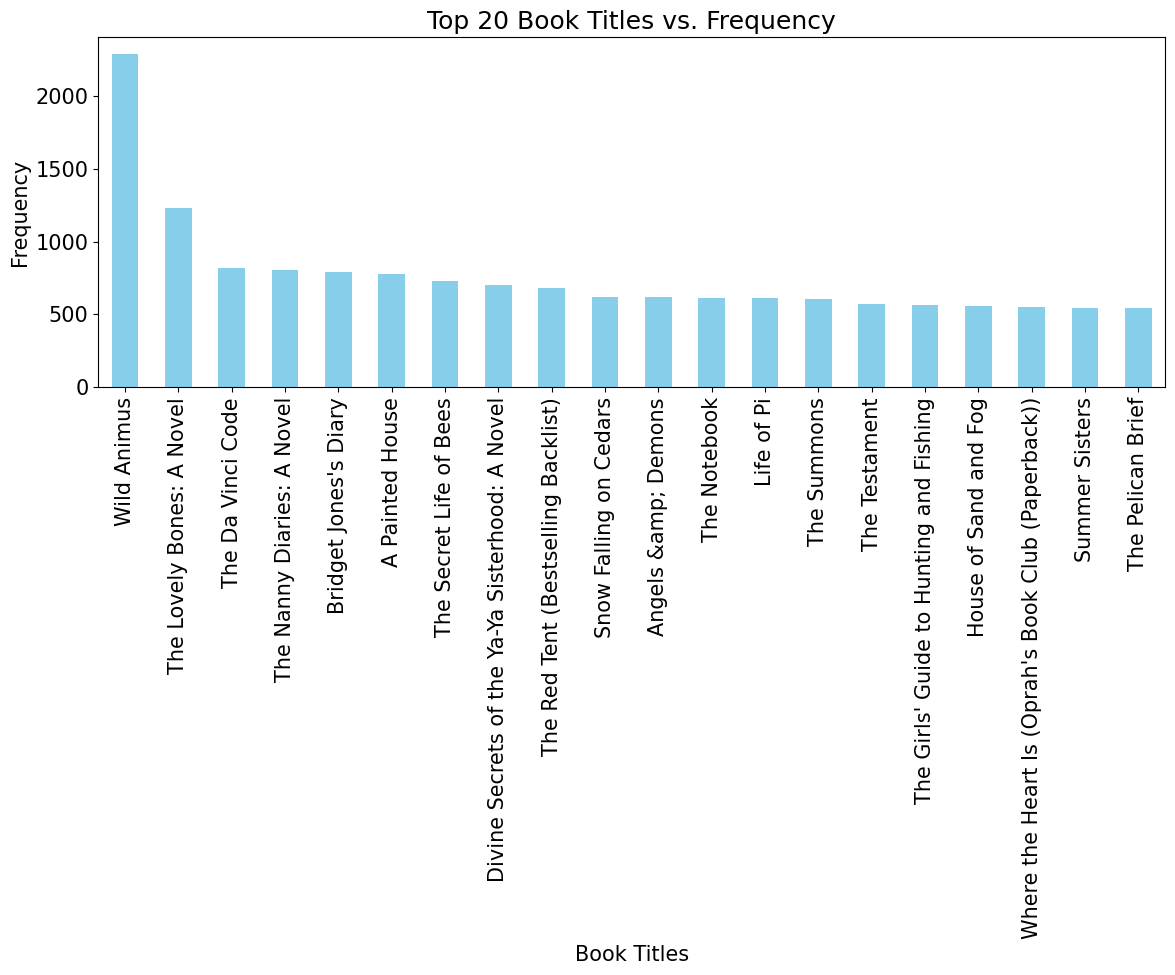

In [123]:
# BAR CAHRT SHOWING THE TOP 20 MOST FREQUENT BOOK TITLES AND FREQUENCIES.

book_title_counts = merged_data['Book-Title'].value_counts()

# Select the top 20 most frequent book titles
top_book_title_counts = book_title_counts.head(20)

plt.figure(figsize=(12,10))
top_book_title_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Book Titles')
plt.ylabel('Frequency')
plt.title('Top 20 Book Titles vs. Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

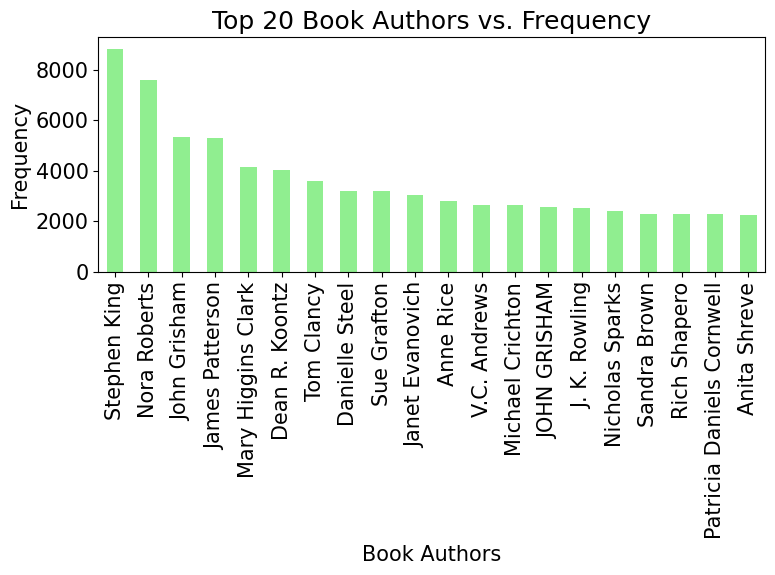

In [124]:
# BAR CHART OF BOOK AUTHORS VS FREQUENCY

book_author_counts = merged_data['Book-Author'].value_counts()

# Select the top 20 most frequent book authors (adjust as needed)
top_book_author_counts = book_author_counts.head(20)

# Create a bar chart of book authors vs. frequency
plt.figure(figsize=(8,6))
top_book_author_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Book Authors')
plt.ylabel('Frequency')
plt.title('Top 20 Book Authors vs. Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

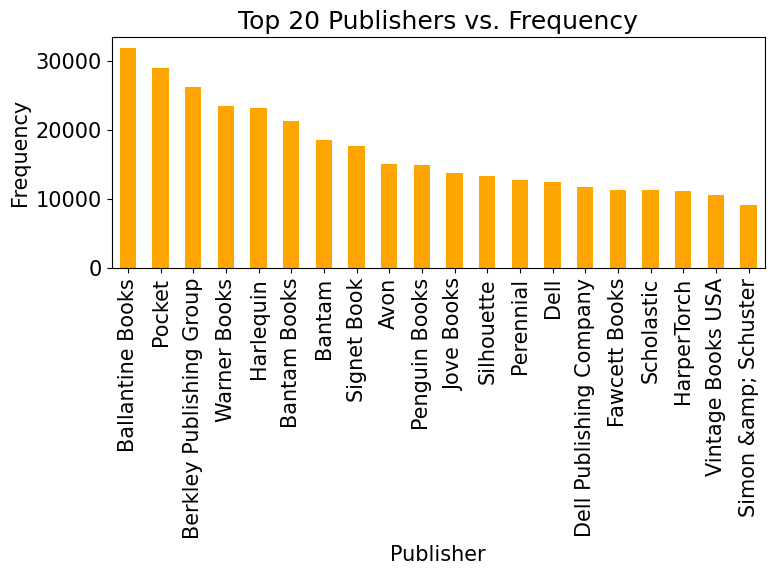

In [125]:
# BAR CHART OF PUBLISHERS VS FREQUENCY

# Count the frequency of each publisher
publisher_counts = merged_data['Publisher'].value_counts()

# Select the top 20 most frequent publishers (adjust as needed)
top_publisher_counts = publisher_counts.head(20)

# Create a bar chart of publishers vs. frequency
plt.figure(figsize=(8, 6))
top_publisher_counts.plot(kind='bar', color='orange')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.title('Top 20 Publishers vs. Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


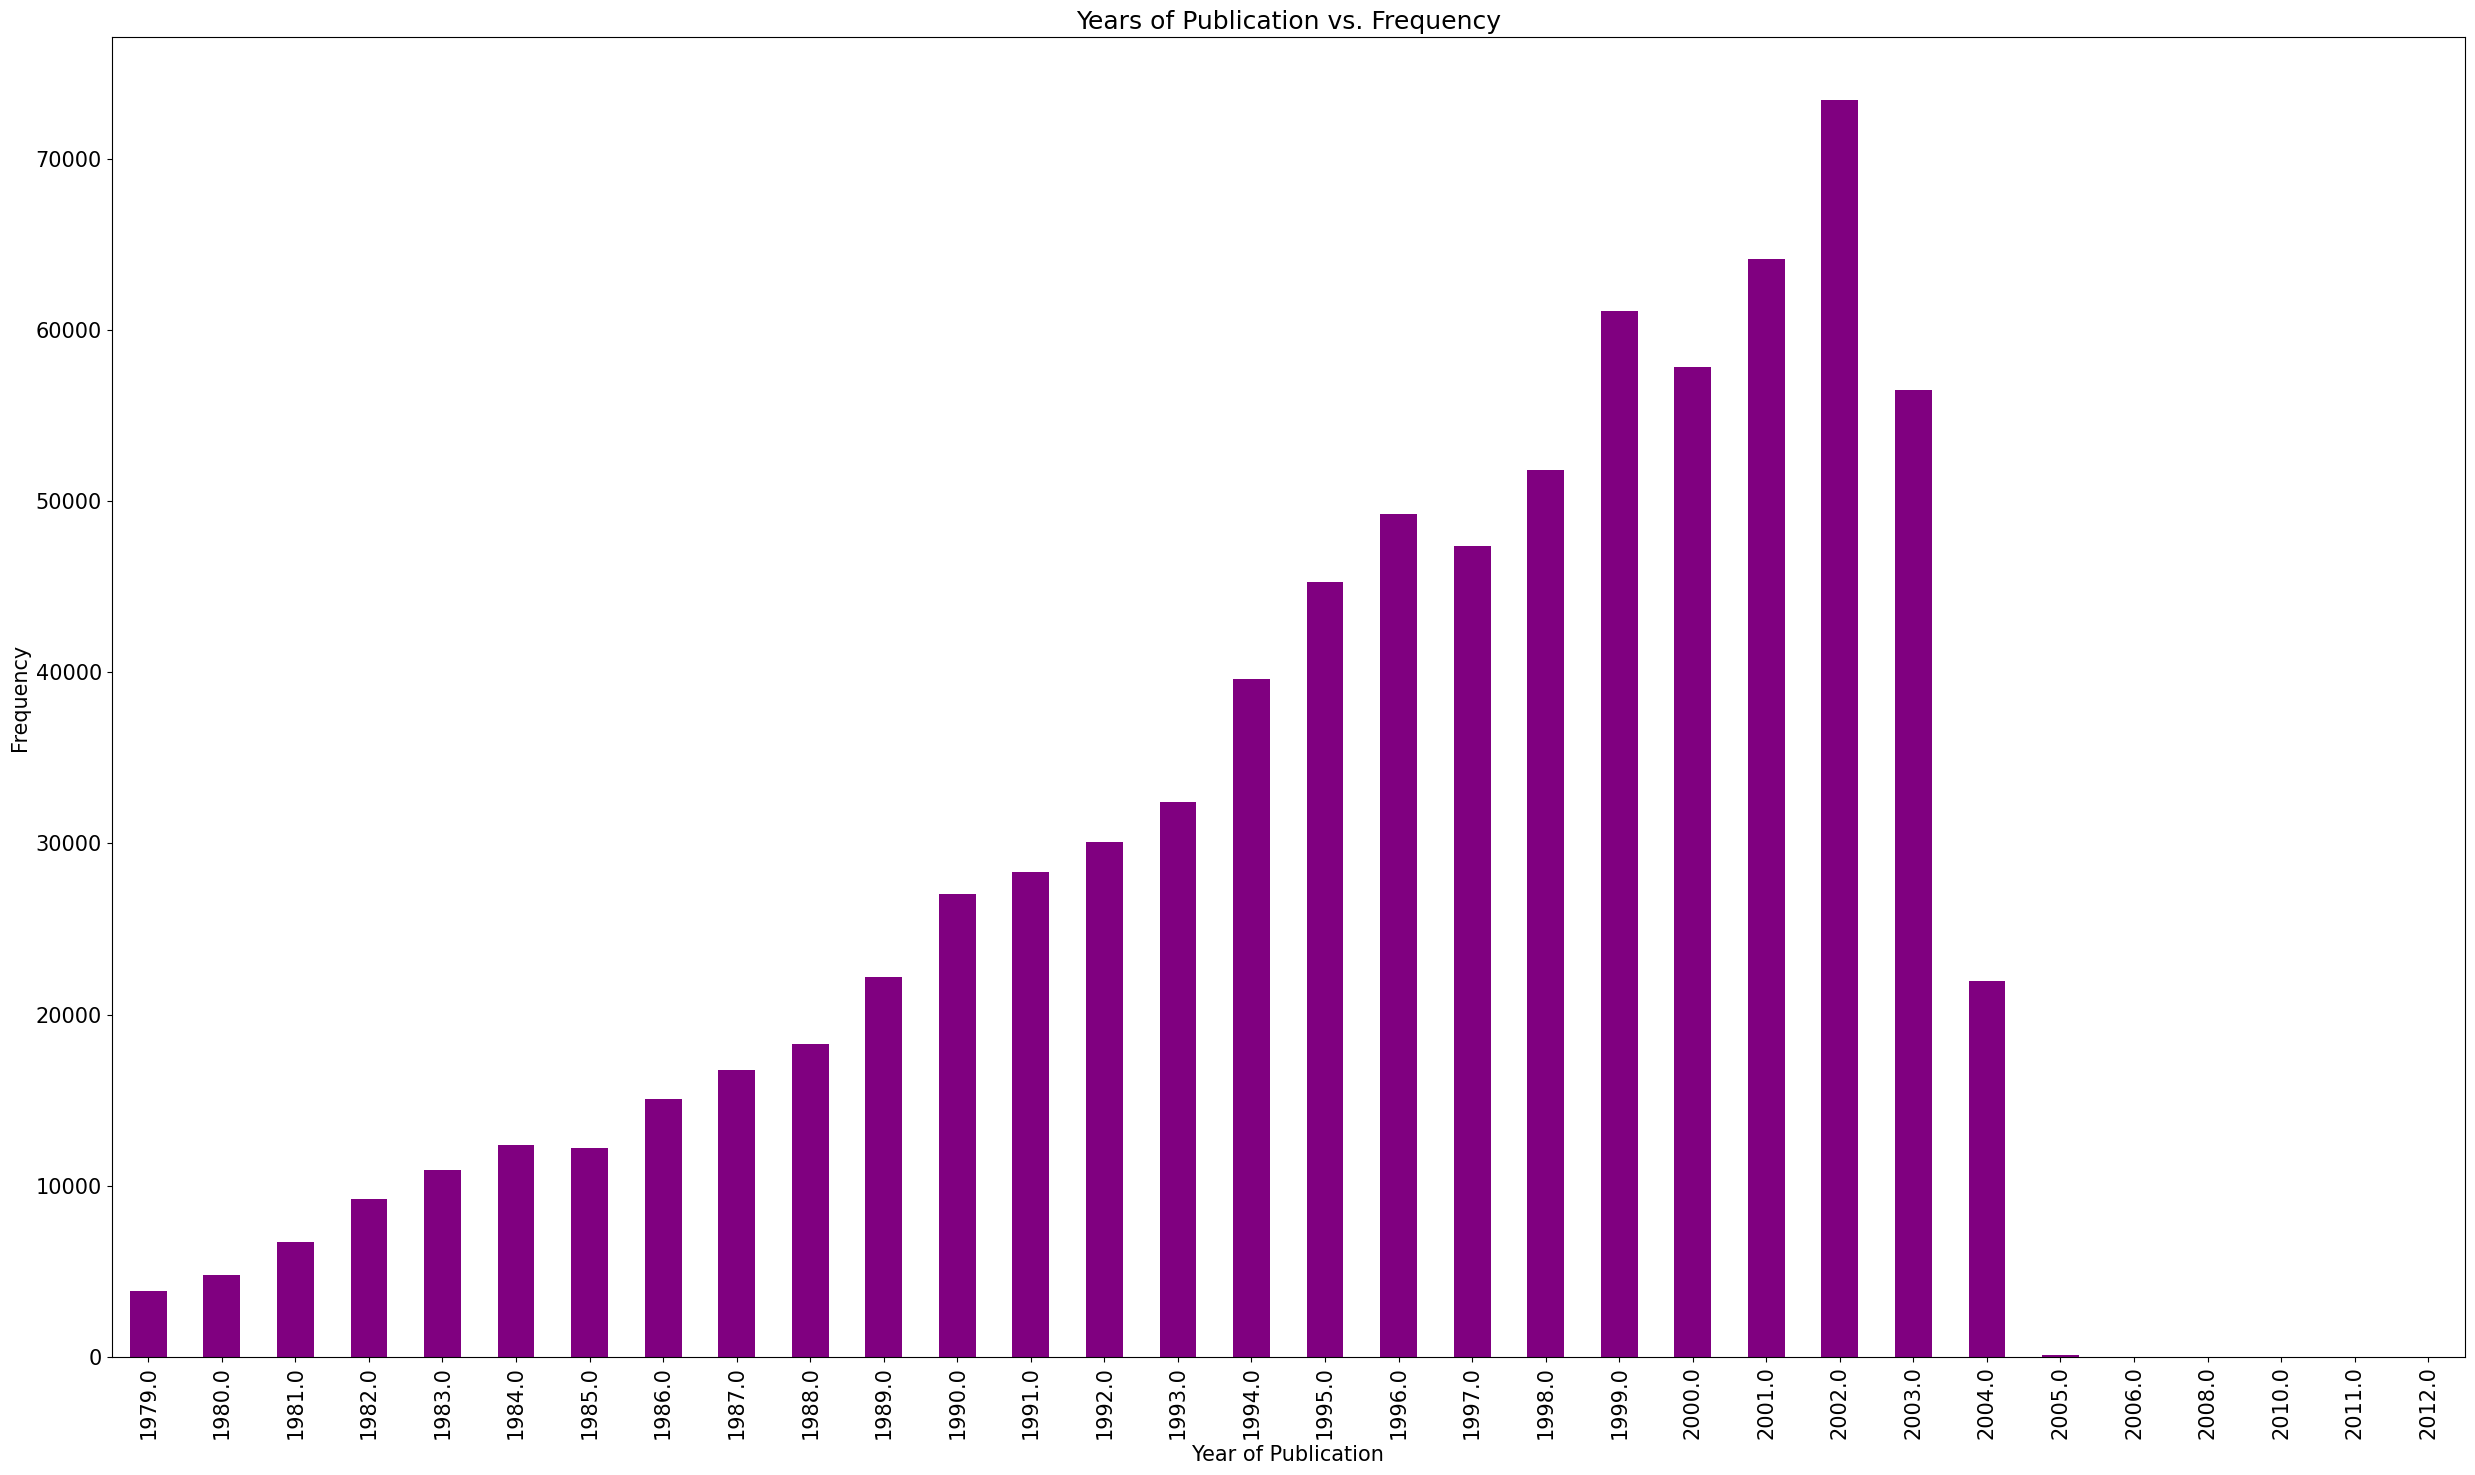

In [126]:
# BAR CHART FOR YEARS OF PUBLICATION VS FREQUENCY

# Count the frequency of each year of publication
year_counts = merged_data['Year-Of-Publication'].value_counts()

# Sort the years in ascending order
year_counts = year_counts.sort_index()

# Create a bar chart of years of publication vs. frequency
plt.figure(figsize=(25, 15))
year_counts.plot(kind='bar', color='purple')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.title('Years of Publication vs. Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

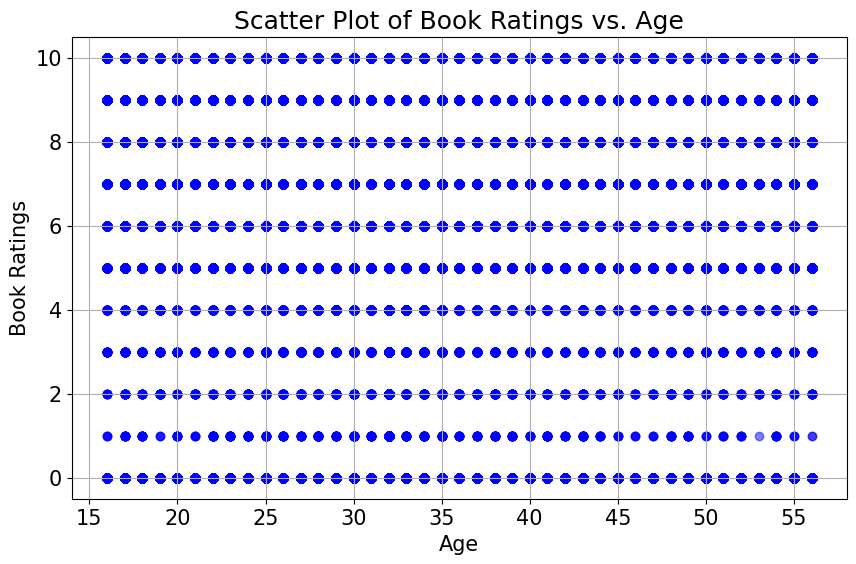

In [127]:
# SCATTER PLOT OF BOOK RATINGS VS AGE

book_ratings = merged_data['Book-Rating']
user_ages = merged_data['Age']

plt.figure(figsize=(10, 6))
plt.scatter(user_ages, book_ratings, alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Book Ratings')
plt.title('Scatter Plot of Book Ratings vs. Age')
plt.grid(True)
plt.show()

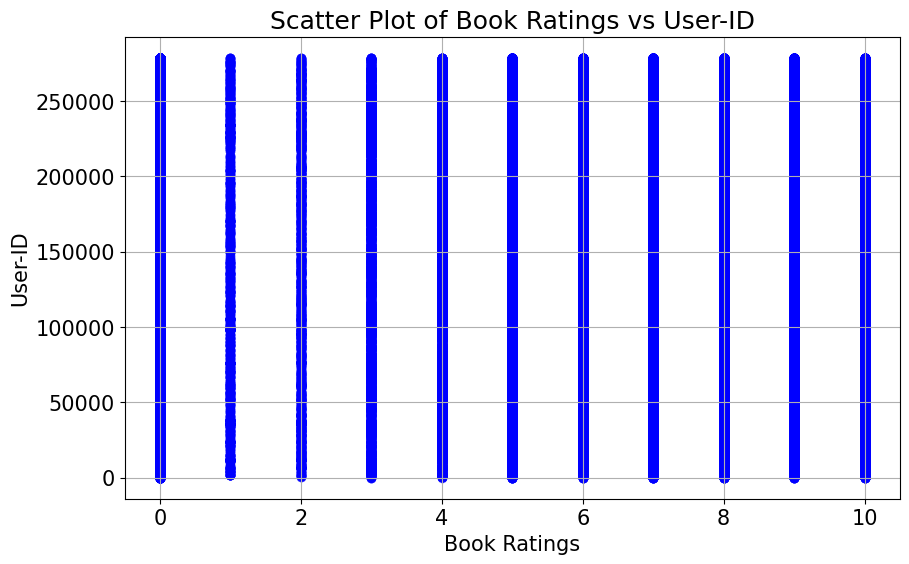

In [128]:
# SCATTER PLOT FOR BOOK-RATINGS VS USERS

book_ratings = merged_data['Book-Rating']
users = merged_data['User-ID']


plt.figure(figsize=(10, 6))
plt.scatter(book_ratings, users, alpha=0.5, color='blue')
plt.xlabel('Book Ratings')
plt.ylabel('User-ID')
plt.title('Scatter Plot of Book Ratings vs User-ID')
plt.grid(True)
plt.show()

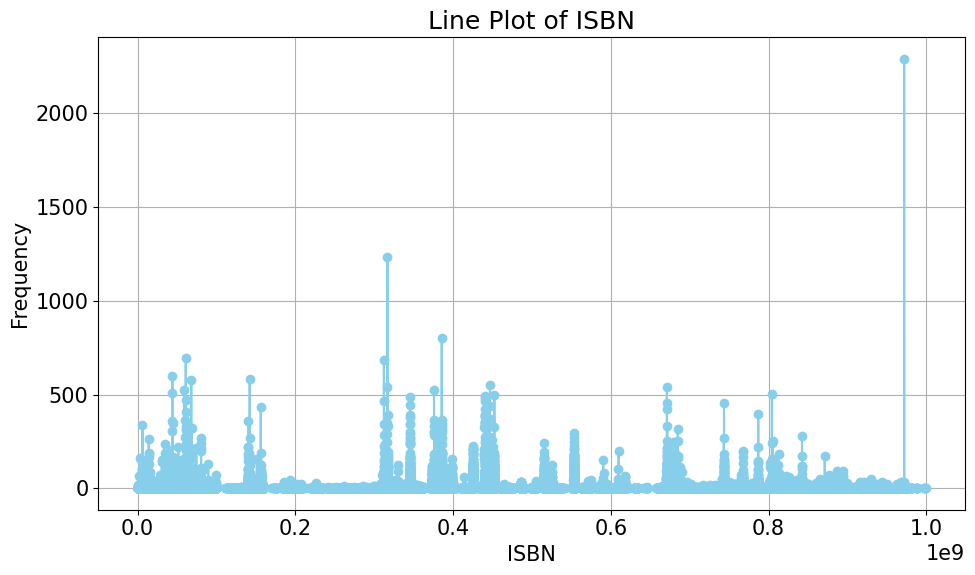

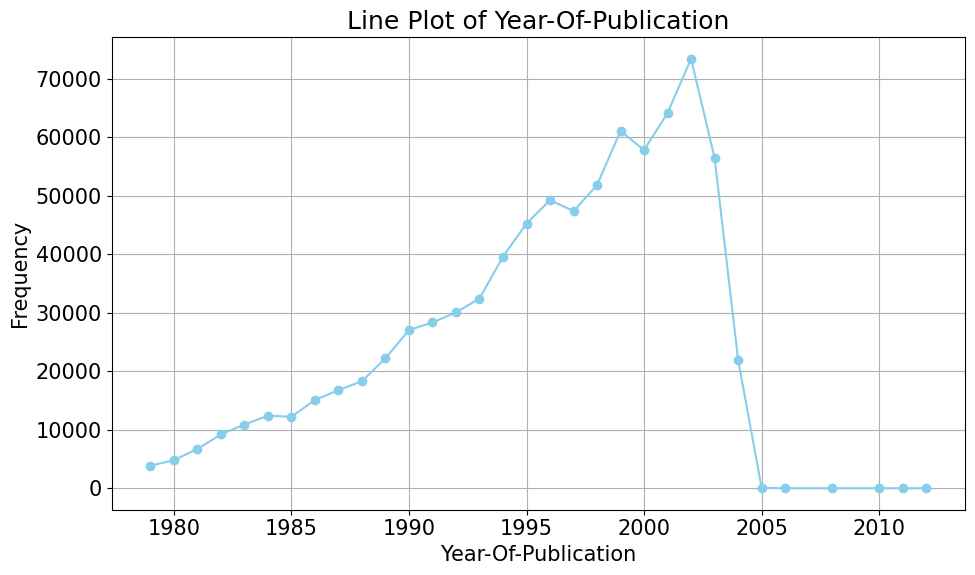

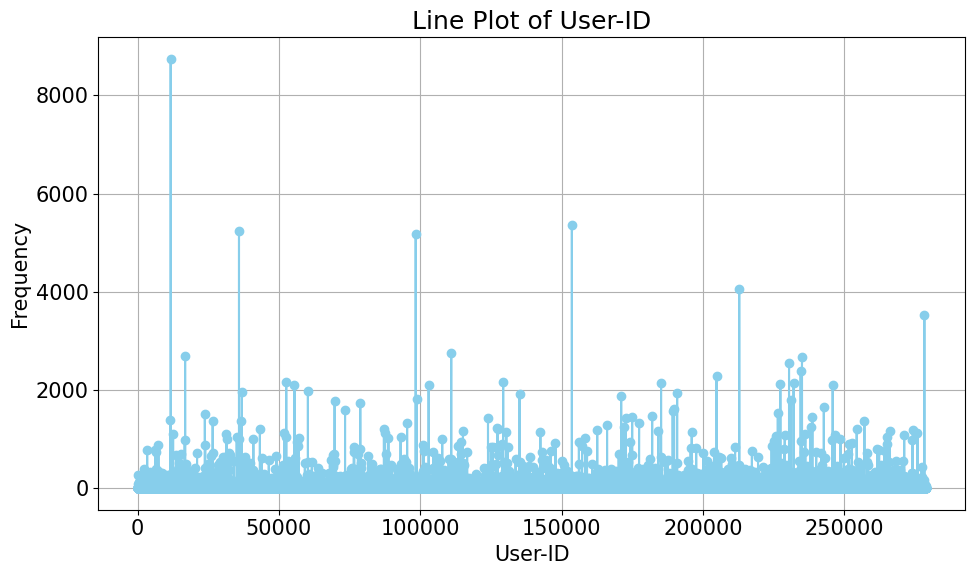

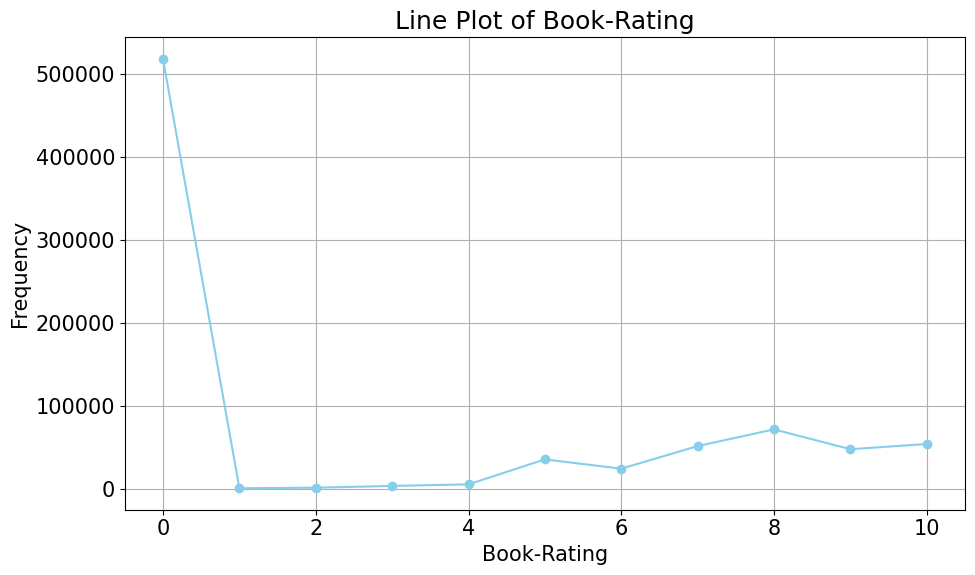

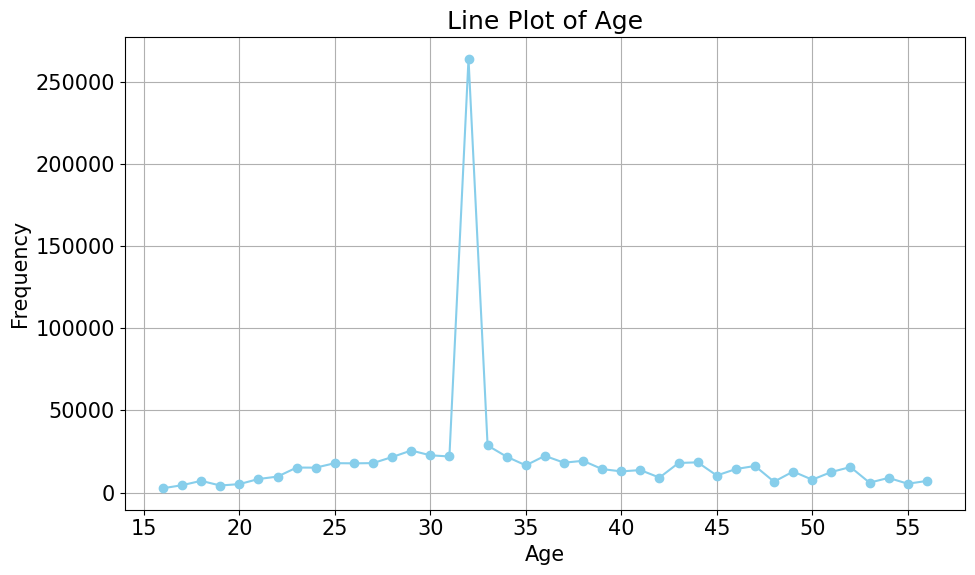

In [129]:
# LINE PLOT FOR THE NUMERIC VALUES.

int_columns = merged_data.select_dtypes(include=['int64','float64']).columns


for column in int_columns:
    plt.figure(figsize=(10, 6))
    merged_data.groupby(column).size().plot(kind='line', marker='o', color='skyblue')
    plt.title(f'Line Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

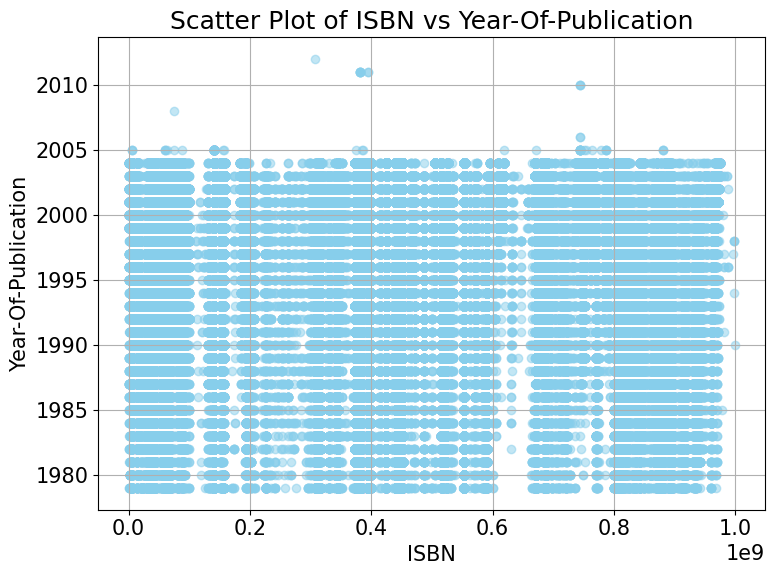

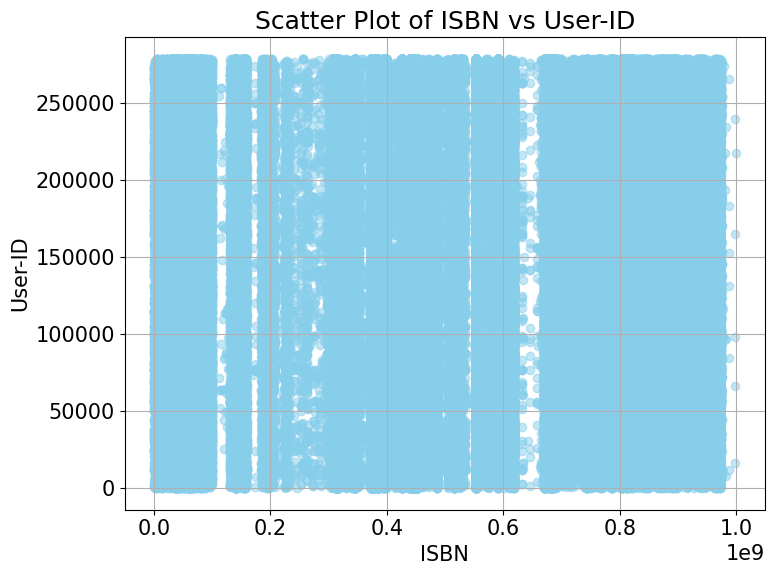

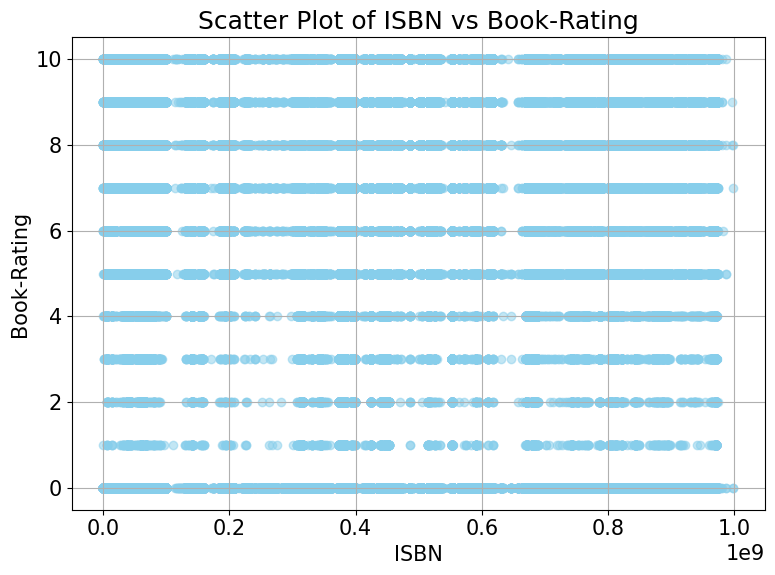

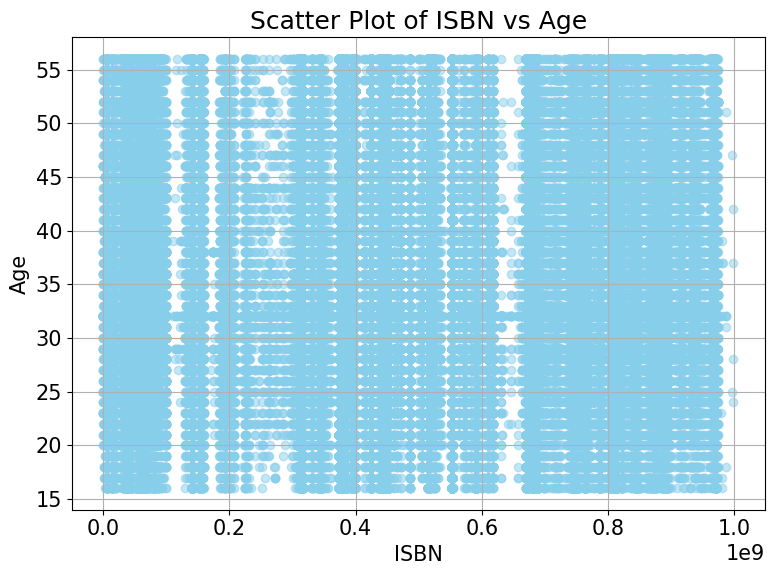

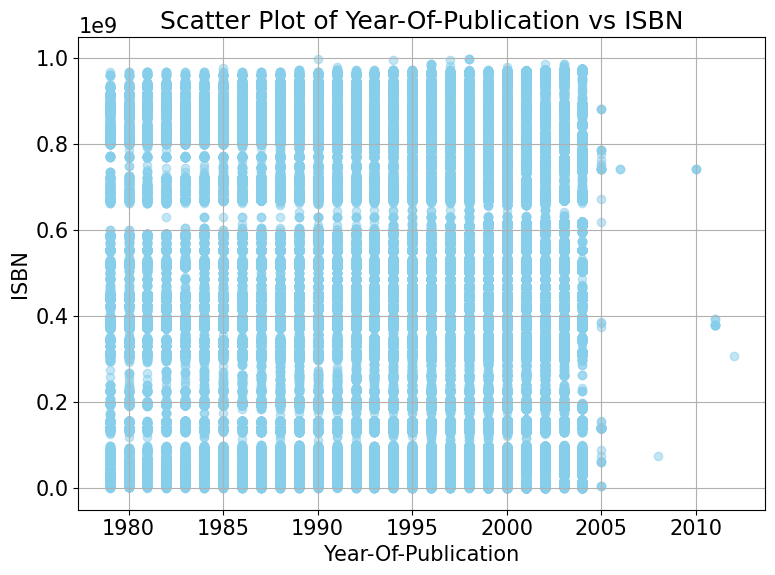

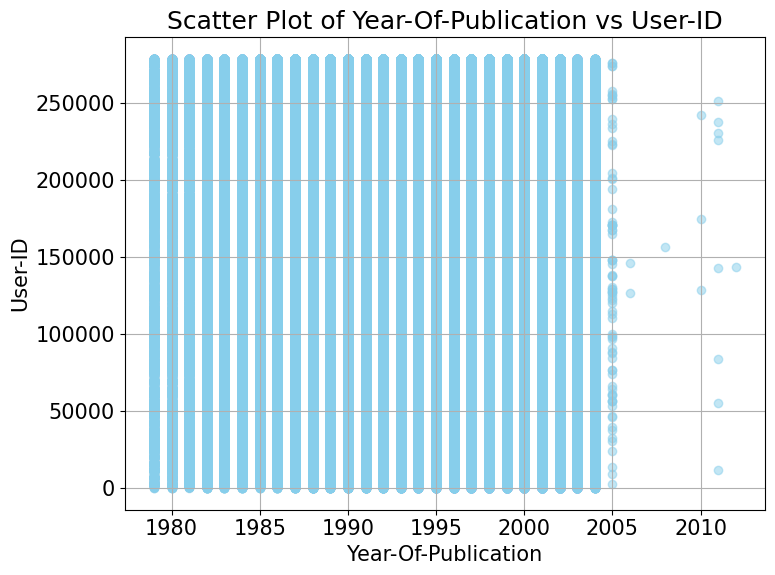

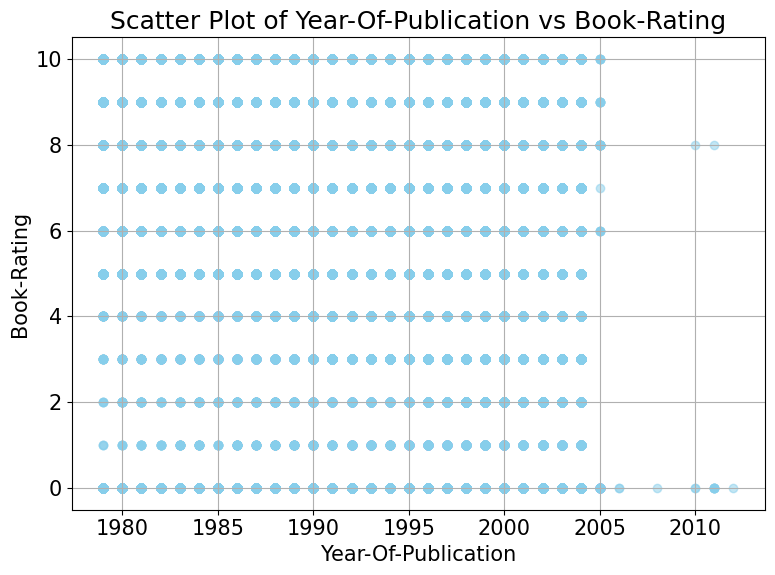

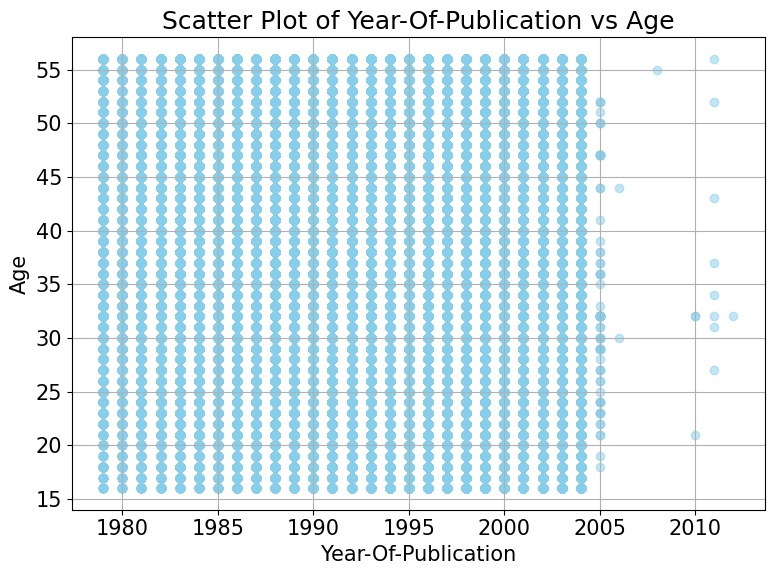

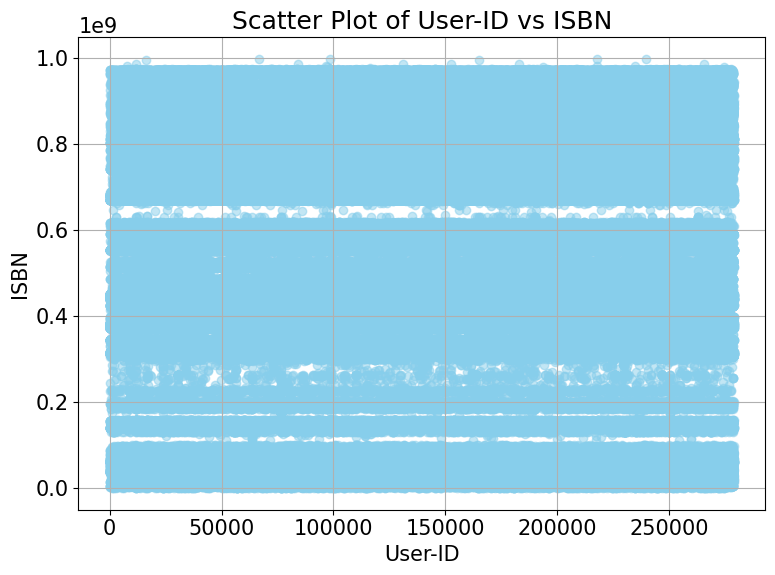

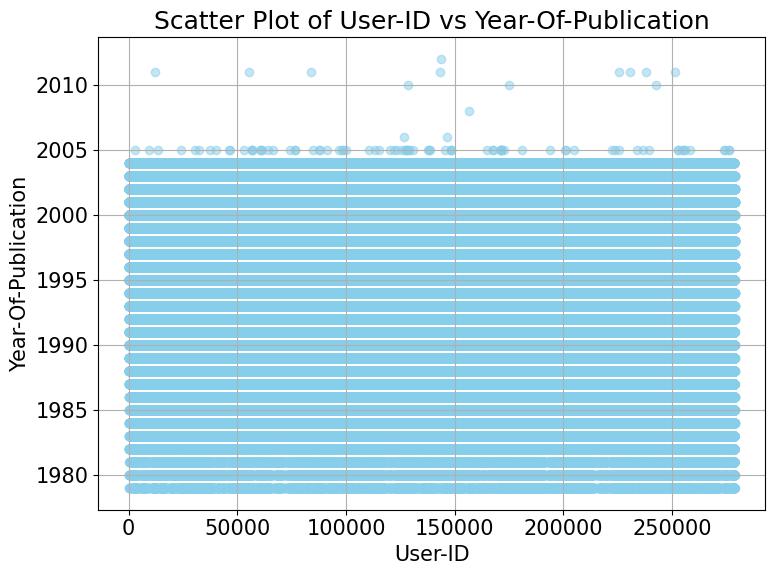

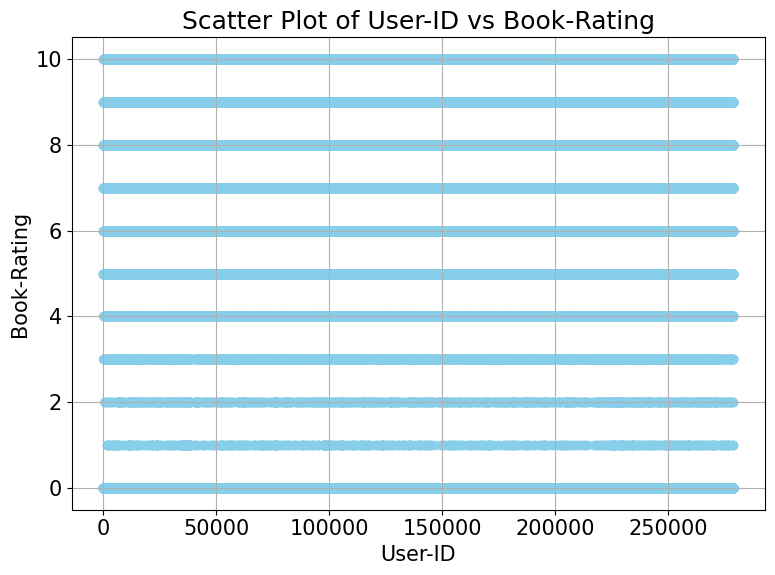

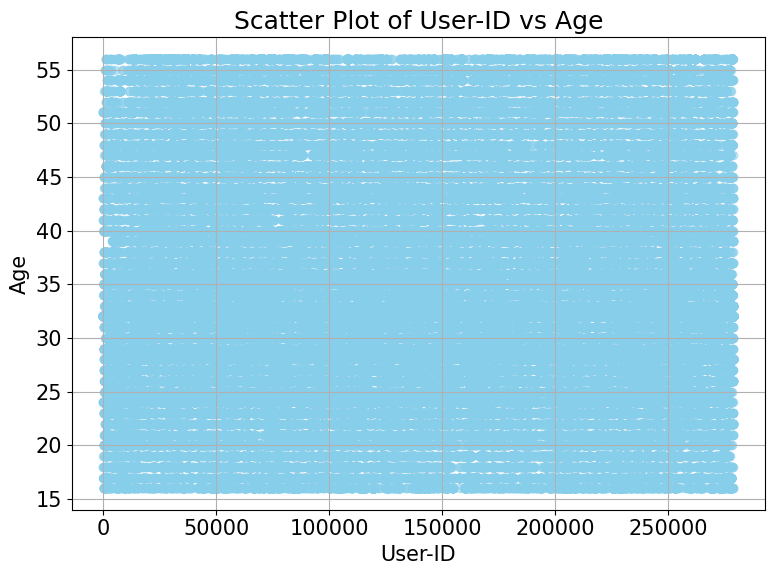

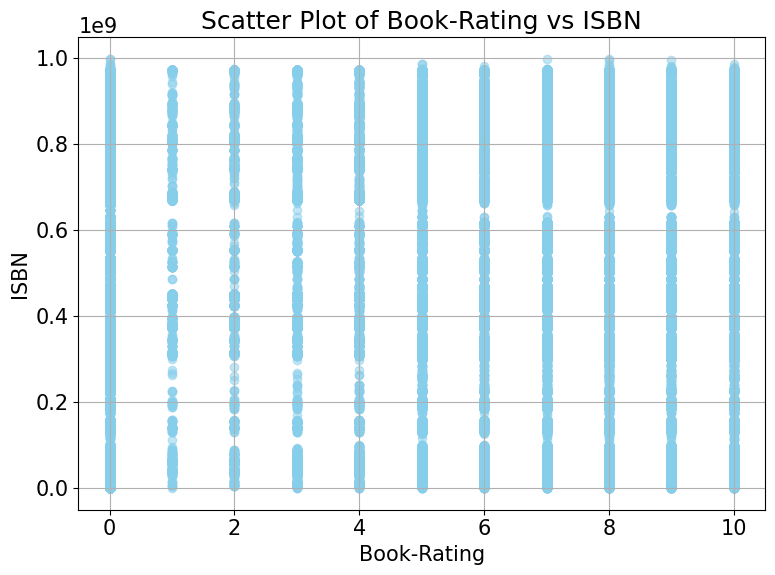

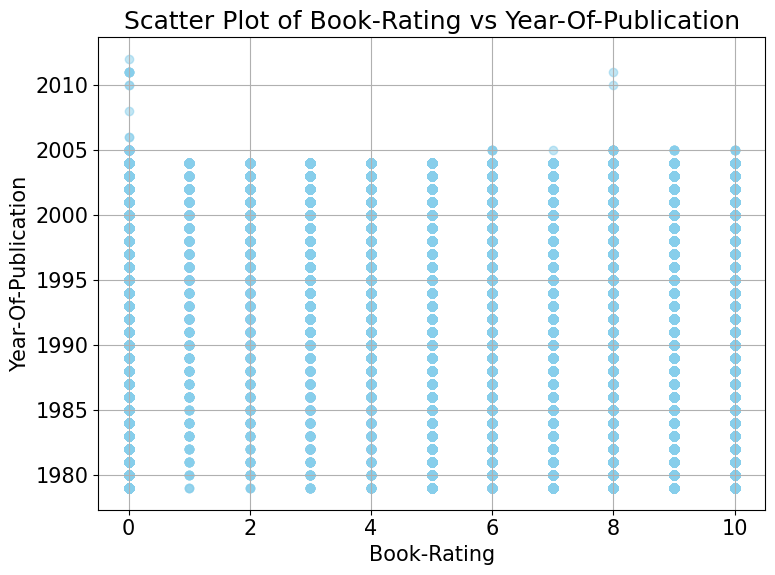

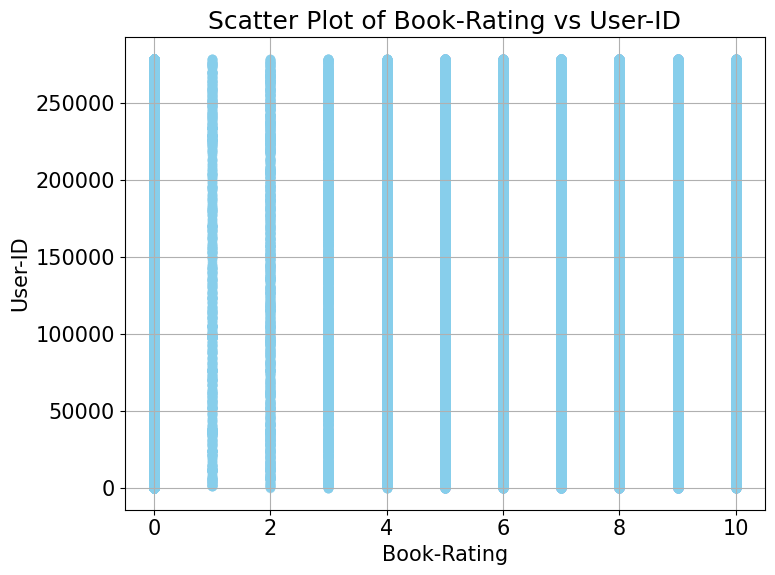

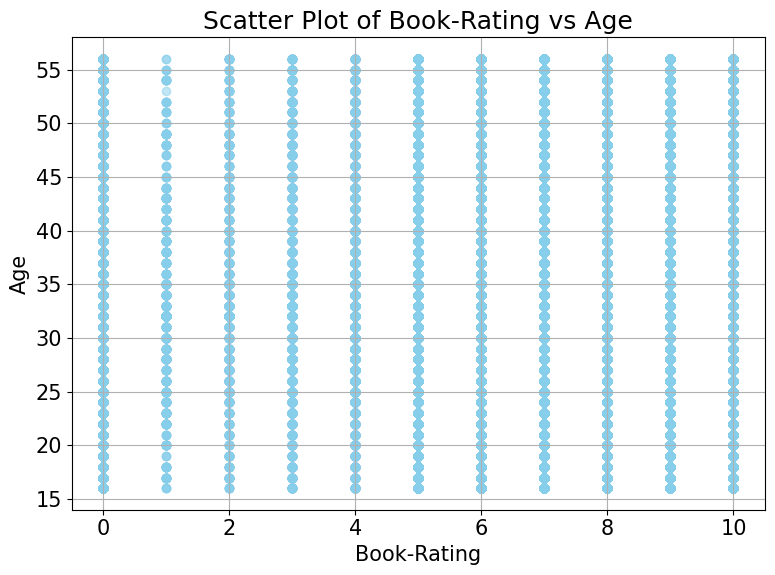

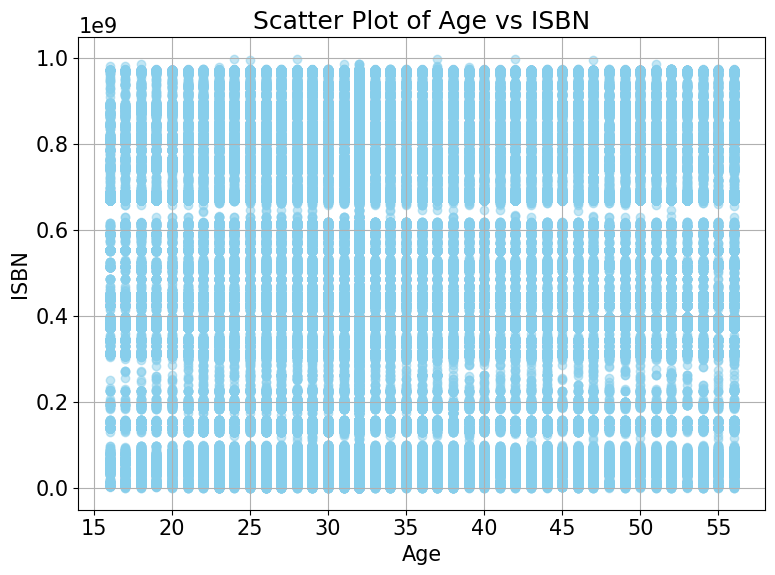

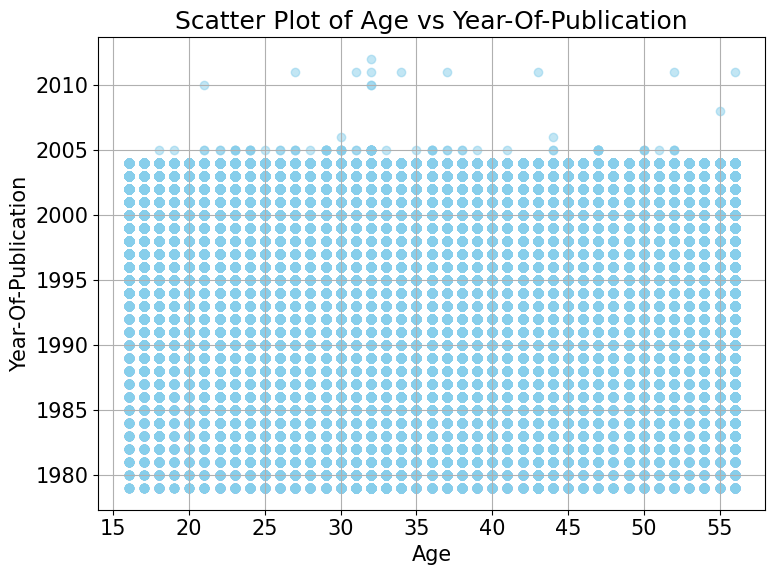

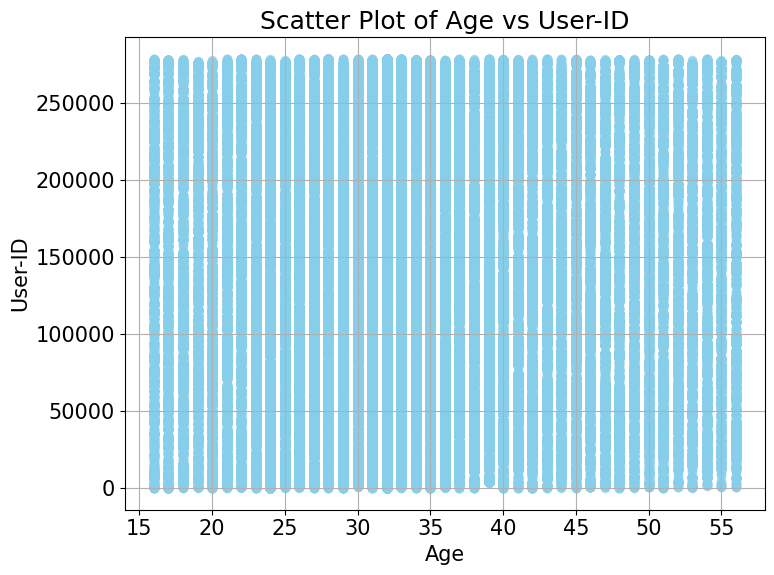

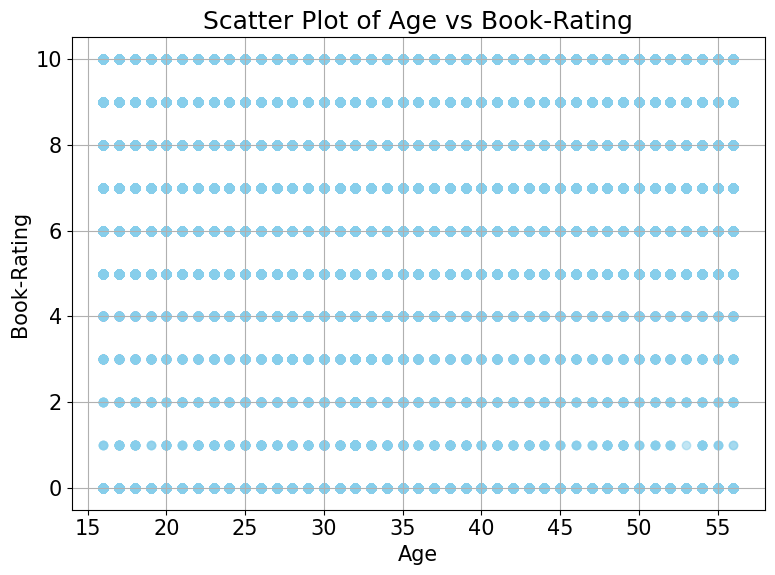

In [130]:
# SCATTER PLOT FOR EVERY COLUMN WITH EVERY COLUMN

numeric_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns

# Plot scatter plots for each pair of numerical columns
for i, column1 in enumerate(numeric_columns):
    for j, column2 in enumerate(numeric_columns):
        if i != j:
            plt.figure(figsize=(8, 6))
            plt.scatter(merged_data[column1], merged_data[column2], color='skyblue', alpha=0.5)
            plt.title(f'Scatter Plot of {column1} vs {column2}')
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

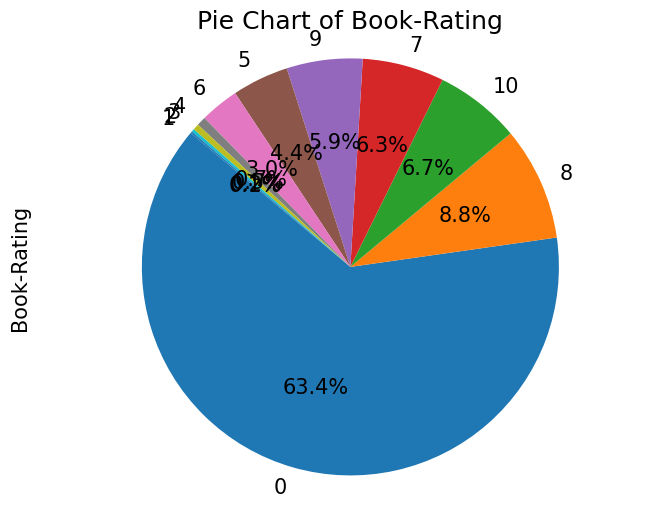

In [131]:
# PIE CHART 

selected_column = 'Book-Rating'

plt.figure(figsize=(8, 6))
merged_data[selected_column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {selected_column}')
plt.axis('equal')
plt.show()

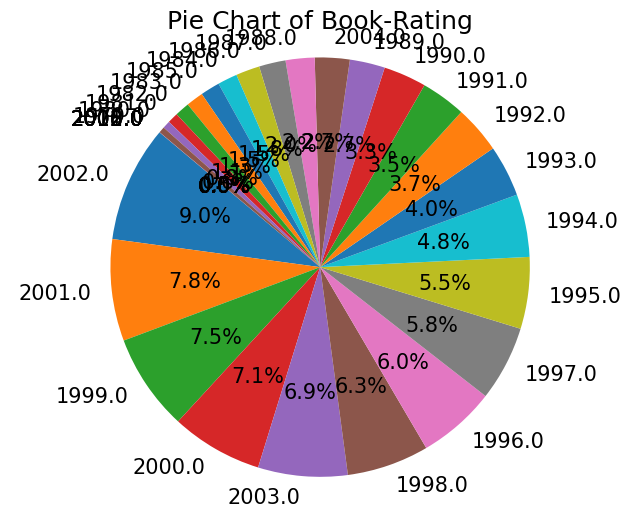

In [132]:
# PIE CHART

column_values = merged_data["Year-Of-Publication"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(column_values, labels=column_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {selected_column}')
plt.axis('equal')  
plt.show()

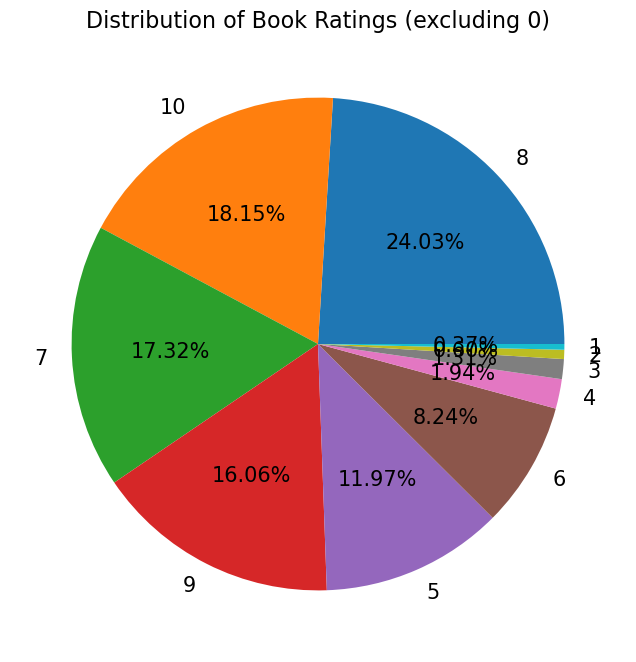

In [133]:
# PIE CHART WITH EXCLUDING ZERO

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))

# Filter out rows with 0 rating
filtered_data = merged_data[merged_data['Book-Rating'] != 0]

# Get rating counts
rating_counts = filtered_data['Book-Rating'].value_counts()

# Get labels
labels = rating_counts.index.to_list()

# Create the pie chart with default colors
plt.pie(rating_counts, labels=labels, autopct='%.2f%%')
plt.title('Distribution of Book Ratings (excluding 0)', fontsize=16)
plt.show()


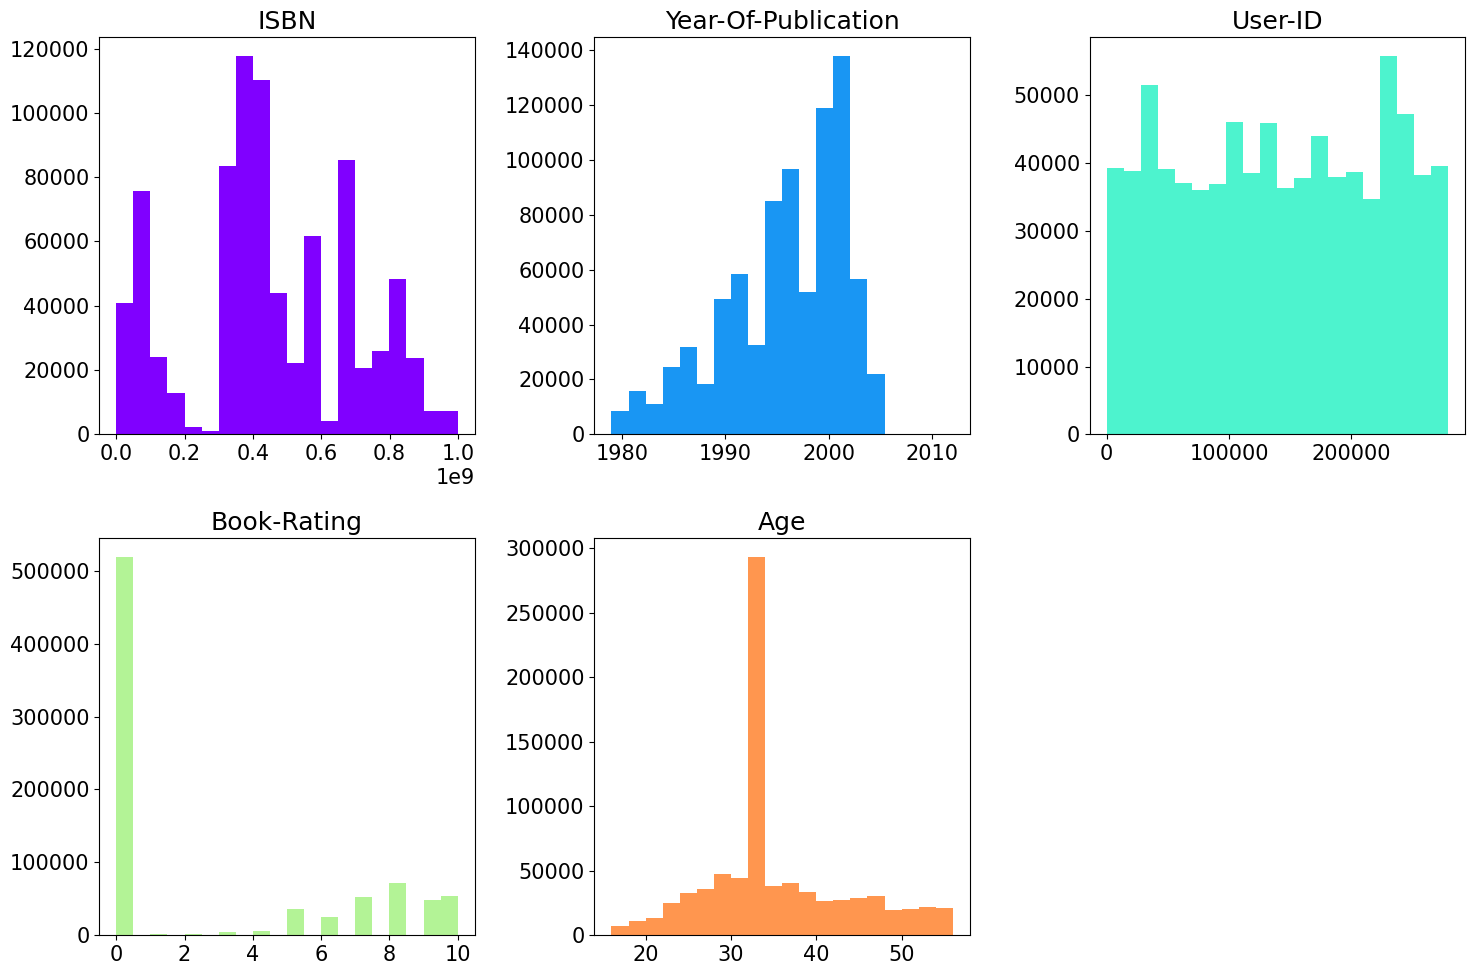

In [134]:
# HISTOGRAM

import numpy as np
import matplotlib.pyplot as plt

# Define the number of rows and columns for subplot layout
num_rows = 4  
num_cols = 3  

# Select numerical columns
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the total number of plots needed
total_plots = len(numerical_columns)

# Calculate the number of rows needed based on the total number of plots
num_rows_needed = (total_plots - 1) // num_cols + 1

# Create figure and axes
fig, axs = plt.subplots(num_rows_needed, num_cols, figsize=(15, num_rows_needed * 5))

# Loop through each numerical column and create colorful histograms
for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].hist(merged_data[column], bins=20, color=plt.cm.rainbow(i / total_plots))
    axs[row, col].set_title(column)

# Hide any empty subplots
for j in range(total_plots, num_rows_needed * num_cols):
    row = j // num_cols
    col = j % num_cols
    axs[row, col].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


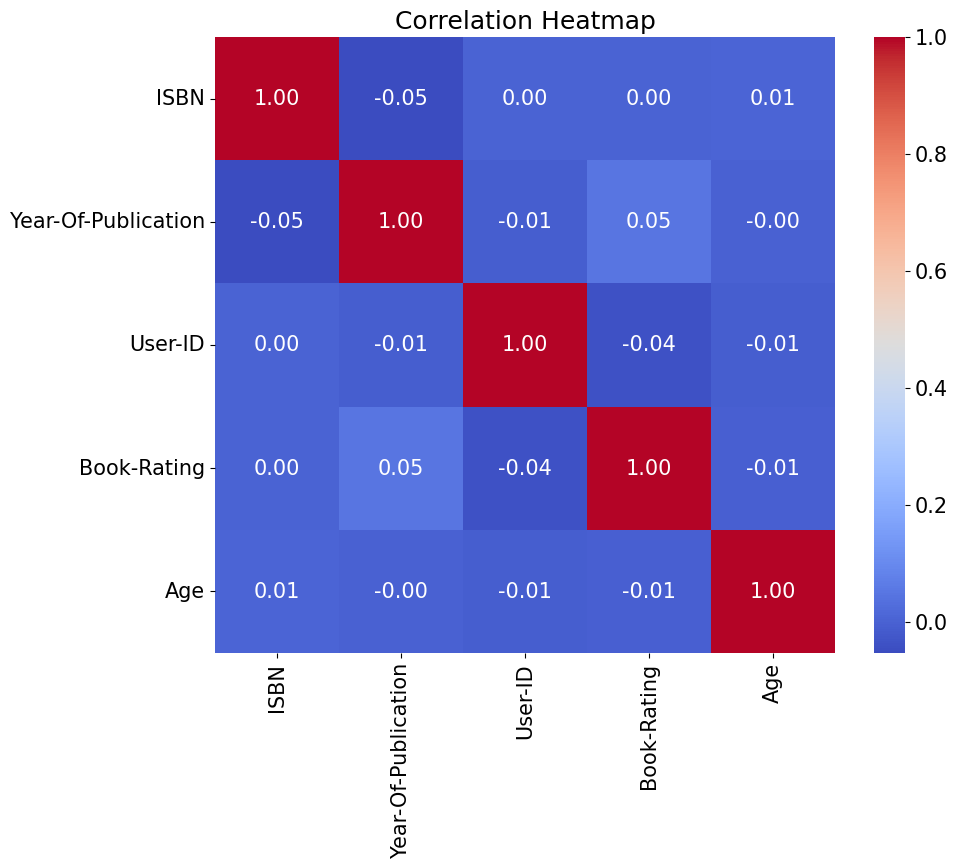

In [135]:
# HEAT MAP
correlation_matrix = merged_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

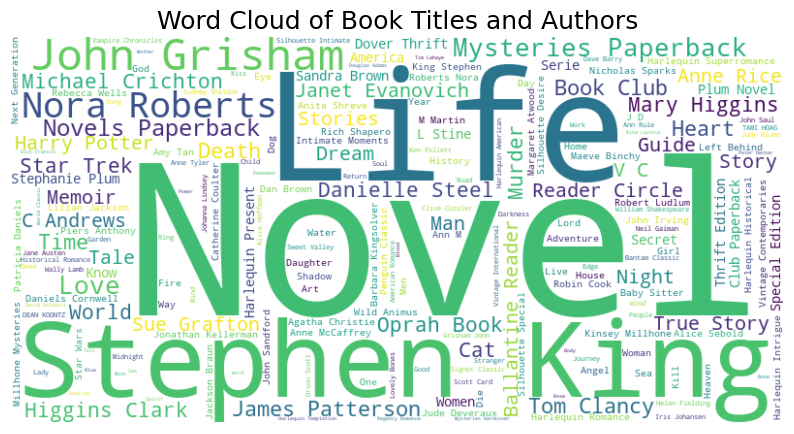

In [136]:
# WORD CLOUD OF BOOK TITILES AND AUTHORS.
from wordcloud import WordCloud

# Concatenate book titles and authors into a single string
text = ' '.join(merged_data['Book-Title']) + ' ' + ' '.join(merged_data['Book-Author'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles and Authors')
plt.show()

## MODEL BUILDING.

### COLLABORATIVE FILTERING

In [137]:
# pip install scikit-surprise

In [138]:
ratings_with_name = df2.merge(df1,on='ISBN')

In [139]:
ratings_with_name.head()

User-ID        ISBN  Book-Rating            Book-Title Book-Author  \
0   276725  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
1     2313  034545104X            5  Flesh Tones: A Novel  M. J. Rose   
2     6543  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
3     8680  034545104X            5  Flesh Tones: A Novel  M. J. Rose   
4    10314  034545104X            9  Flesh Tones: A Novel  M. J. Rose   

  Year-Of-Publication         Publisher  \
0                2002  Ballantine Books   
1                2002  Ballantine Books   
2                2002  Ballantine Books   
3                2002  Ballantine Books   
4                2002  Ballantine Books   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   
2  http://images.amazon.com/images/P/034545104X.0...   
3  http://images.amazon.com/images/P/034545104X.0...   
4  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   
2  http://images.amazon.com/images/P/034545104X.0...   
3  http://images.amazon.com/images/P/034545104X.0...   
4  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/034545104X.0...  
1  http://images.amazon.com/images/P/034545104X.0...  
2  http://images.amazon.com/images/P/034545104X.0...  
3  http://images.amazon.com/images/P/034545104X.0...  
4  http://images.amazon.com/images/P/034545104X.0...

In [140]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

Book-Title  num_ratings
0        A Light in the Storm: The Civil War Diary of ...            4
1                                   Always Have Popsicles            1
2                    Apple Magic (The Collector's series)            1
3        Ask Lily (Young Women of Faith: Lily Series, ...            1
4        Beyond IBM: Leadership Marketing and Finance ...            1
...                                                   ...          ...
241066                                      Ã?Â?lpiraten.            2
241067                     Ã?Â?rger mit Produkt X. Roman.            4
241068                                Ã?Â?sterlich leben.            1
241069                              Ã?Â?stlich der Berge.            3
241070                                  Ã?Â?thique en toc            2

[241071 rows x 2 columns]

In [141]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

Book-Title  avg_rating
0        A Light in the Storm: The Civil War Diary of ...    2.250000
1                                   Always Have Popsicles    0.000000
2                    Apple Magic (The Collector's series)    0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...    8.000000
4        Beyond IBM: Leadership Marketing and Finance ...    0.000000
...                                                   ...         ...
241066                                      Ã?Â?lpiraten.    0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.    5.250000
241068                                Ã?Â?sterlich leben.    7.000000
241069                              Ã?Â?stlich der Berge.    2.666667
241070                                  Ã?Â?thique en toc    4.000000

[241071 rows x 2 columns]

In [142]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

Book-Title  num_ratings  \
0        A Light in the Storm: The Civil War Diary of ...            4   
1                                   Always Have Popsicles            1   
2                    Apple Magic (The Collector's series)            1   
3        Ask Lily (Young Women of Faith: Lily Series, ...            1   
4        Beyond IBM: Leadership Marketing and Finance ...            1   
...                                                   ...          ...   
241066                                      Ã?Â?lpiraten.            2   
241067                     Ã?Â?rger mit Produkt X. Roman.            4   
241068                                Ã?Â?sterlich leben.            1   
241069                              Ã?Â?stlich der Berge.            3   
241070                                  Ã?Â?thique en toc            2   

        avg_rating  
0         2.250000  
1         0.000000  
2         0.000000  
3         8.000000  
4         0.000000  
...            ...  
241066    0.000000  
241067    5.250000  
241068    7.000000  
241069    2.666667  
241070    4.000000  

[241071 rows x 3 columns]

In [143]:
popular_df[popular_df["avg_rating"] >=5].count()

Book-Title     68217
num_ratings    68217
avg_rating     68217
dtype: int64

In [144]:
popular_df[popular_df['Book-Title'] == 'A Painted House']

Book-Title  num_ratings  avg_rating
5303  A Painted House          838    3.231504

In [145]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(100)

In [146]:
popular_df = popular_df.merge(df1,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [147]:
popular_df

Book-Title         Book-Author  \
0    Harry Potter and the Prisoner of Azkaban (Book 3)       J. K. Rowling   
3         Harry Potter and the Goblet of Fire (Book 4)       J. K. Rowling   
5       Harry Potter and the Sorcerer's Stone (Book 1)       J. K. Rowling   
9    Harry Potter and the Order of the Phoenix (Boo...       J. K. Rowling   
13    Harry Potter and the Chamber of Secrets (Book 2)       J. K. Rowling   
..                                                 ...                 ...   
338                                    The Beach House     James Patterson   
344                                 The Hours: A Novel  Michael Cunningham   
345                                         Icy Sparks    Gwyn Hyman Rubio   
347                    Angela's Ashes (MMP) : A Memoir       Frank McCourt   
348                                     How to Be Good         Nick Hornby   

                                           Image-URL-M  num_ratings  \
0    http://images.amazon.com/images/P/0439136350.0...          428   
3    http://images.amazon.com/images/P/0439139597.0...          387   
5    http://images.amazon.com/images/P/0590353403.0...          278   
9    http://images.amazon.com/images/P/043935806X.0...          347   
13   http://images.amazon.com/images/P/0439064872.0...          556   
..                                                 ...          ...   
338  http://images.amazon.com/images/P/0446612545.0...          435   
344  http://images.amazon.com/images/P/0312305060.0...          294   
345  http://images.amazon.com/images/P/0142000205.0...          309   
347  http://images.amazon.com/images/P/0684872153.0...          326   
348  http://images.amazon.com/images/P/1573229326.0...          304   

     avg_rating  
0      5.852804  
3      5.824289  
5      5.737410  
9      5.501441  
13     5.183453  
..          ...  
338    3.347126  
344    3.346939  
345    3.346278  
347    3.337423  
348    3.305921  

[100 rows x 5 columns]

In [148]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [149]:
print("http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg")

http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg


In [150]:
popular_df[popular_df['Book-Title'] == 'A Painted House']

Empty DataFrame
Columns: [Book-Title, Book-Author, Image-URL-M, num_ratings, avg_rating]
Index: []

In [151]:
import pandas as pd

# Assuming popular_df is your DataFrame
popular_df.loc[(popular_df['Book-Title'] == 'A Painted House') & (popular_df['Book-Author'] == 'John Grisham'), 'Image-URL-M'] = 'http://images.amazon.com/images/P/0553712527.01.MZZZZZZZ.jpg'


In [152]:
popular_df.head()

Book-Title    Book-Author  \
0   Harry Potter and the Prisoner of Azkaban (Book 3)  J. K. Rowling   
3        Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   
5      Harry Potter and the Sorcerer's Stone (Book 1)  J. K. Rowling   
9   Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
13   Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling   

                                          Image-URL-M  num_ratings  avg_rating  
0   http://images.amazon.com/images/P/0439136350.0...          428    5.852804  
3   http://images.amazon.com/images/P/0439139597.0...          387    5.824289  
5   http://images.amazon.com/images/P/0590353403.0...          278    5.737410  
9   http://images.amazon.com/images/P/043935806X.0...          347    5.501441  
13  http://images.amazon.com/images/P/0439064872.0...          556    5.183453

In [153]:
popular_df

Book-Title         Book-Author  \
0    Harry Potter and the Prisoner of Azkaban (Book 3)       J. K. Rowling   
3         Harry Potter and the Goblet of Fire (Book 4)       J. K. Rowling   
5       Harry Potter and the Sorcerer's Stone (Book 1)       J. K. Rowling   
9    Harry Potter and the Order of the Phoenix (Boo...       J. K. Rowling   
13    Harry Potter and the Chamber of Secrets (Book 2)       J. K. Rowling   
..                                                 ...                 ...   
338                                    The Beach House     James Patterson   
344                                 The Hours: A Novel  Michael Cunningham   
345                                         Icy Sparks    Gwyn Hyman Rubio   
347                    Angela's Ashes (MMP) : A Memoir       Frank McCourt   
348                                     How to Be Good         Nick Hornby   

                                           Image-URL-M  num_ratings  \
0    http://images.amazon.com/images/P/0439136350.0...          428   
3    http://images.amazon.com/images/P/0439139597.0...          387   
5    http://images.amazon.com/images/P/0590353403.0...          278   
9    http://images.amazon.com/images/P/043935806X.0...          347   
13   http://images.amazon.com/images/P/0439064872.0...          556   
..                                                 ...          ...   
338  http://images.amazon.com/images/P/0446612545.0...          435   
344  http://images.amazon.com/images/P/0312305060.0...          294   
345  http://images.amazon.com/images/P/0142000205.0...          309   
347  http://images.amazon.com/images/P/0684872153.0...          326   
348  http://images.amazon.com/images/P/1573229326.0...          304   

     avg_rating  
0      5.852804  
3      5.824289  
5      5.737410  
9      5.501441  
13     5.183453  
..          ...  
338    3.347126  
344    3.346939  
345    3.346278  
347    3.337423  
348    3.305921  

[100 rows x 5 columns]

In [154]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
freq_users = x[x].index

In [155]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(freq_users)]

In [156]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [157]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [158]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [159]:
pt.fillna(0,inplace=True)

In [160]:
pt

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     7.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             2977    3363    4017    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             4385    6251    6323    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             6543    ...  271705  \
Book-Title                                                  ...           
1984                                                   0.0  ...    10.0   
1st to Die: A Novel                                    9.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
A Bend in the Road                                     0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

In [161]:
similarity_scores = cosine_similarity(pt)

In [162]:
similarity_scores.shape

(706, 706)

In [163]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [164]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

###  TESTING THE RECOMMENDATION MODEL

In [165]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

### EXPORT THE PICKLE FILES FOR DEPLOYMENT 

In [166]:
# import pickle
# pickle_out = open('popular.pkl','wb')
# pickle.dump(popular_df,pickle_out)
# pickle_out.close()


In [167]:
books.drop_duplicates('Book-Title')

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271354  0449906736      Flashpoints: Promise and Peril in a New World   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271354          Robin Wright                1993   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271354                                  Ballantine Books   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271354  http://images.amazon.com/images/P/0449906736.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271354  http://images.amazon.com/images/P/0449906736.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

In [168]:
# pickle.dump(pt,open('pt.pkl','wb'))
# pickle.dump(books,open('books.pkl','wb'))
# pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [169]:
popular_df.head(20)

Book-Title         Book-Author  \
0   Harry Potter and the Prisoner of Azkaban (Book 3)       J. K. Rowling   
3        Harry Potter and the Goblet of Fire (Book 4)       J. K. Rowling   
5      Harry Potter and the Sorcerer's Stone (Book 1)       J. K. Rowling   
9   Harry Potter and the Order of the Phoenix (Boo...       J. K. Rowling   
13   Harry Potter and the Chamber of Secrets (Book 2)       J. K. Rowling   
16  The Hobbit : The Enchanting Prelude to The Lor...      J.R.R. TOLKIEN   
17  The Fellowship of the Ring (The Lord of the Ri...      J.R.R. TOLKIEN   
26  Harry Potter and the Sorcerer's Stone (Harry P...       J. K. Rowling   
28     The Two Towers (The Lord of the Rings, Part 2)      J.R.R. TOLKIEN   
39                              To Kill a Mockingbird          Harper Lee   
47                                  The Da Vinci Code           Dan Brown   
53                 The Five People You Meet in Heaven         Mitch Albom   
55                             The Catcher in the Rye       J.D. Salinger   
62                          The Lovely Bones: A Novel        Alice Sebold   
63                                               1984       George Orwell   
72                           Prodigal Summer: A Novel  Barbara Kingsolver   
73                                         Neverwhere         Neil Gaiman   
78                            The Secret Life of Bees       Sue Monk Kidd   
84  Stupid White Men ...and Other Sorry Excuses fo...       Michael Moore   
85  Tuesdays with Morrie: An Old Man, a Young Man,...         MITCH ALBOM   

                                          Image-URL-M  num_ratings  avg_rating  
0   http://images.amazon.com/images/P/0439136350.0...          428    5.852804  
3   http://images.amazon.com/images/P/0439139597.0...          387    5.824289  
5   http://images.amazon.com/images/P/0590353403.0...          278    5.737410  
9   http://images.amazon.com/images/P/043935806X.0...          347    5.501441  
13  http://images.amazon.com/images/P/0439064872.0...          556    5.183453  
16  http://images.amazon.com/images/P/0345339681.0...          281    5.007117  
17  http://images.amazon.com/images/P/0345339703.0...          368    4.948370  
26  http://images.amazon.com/images/P/059035342X.0...          575    4.895652  
28  http://images.amazon.com/images/P/0345339711.0...          260    4.880769  
39  http://images.amazon.com/images/P/0446310786.0...          510    4.700000  
47  http://images.amazon.com/images/P/0385504209.0...          898    4.642539  
53  http://images.amazon.com/images/P/0786868716.0...          430    4.551163  
55  http://images.amazon.com/images/P/0316769487.0...          449    4.545657  
62  http://images.amazon.com/images/P/0316666343.0...         1295    4.468726  
63  http://images.amazon.com/images/P/0451524934.0...          284    4.454225  
72  http://images.amazon.com/images/P/0060959037.0...          253    4.450593  
73  http://images.amazon.com/images/P/0380789019.0...          265    4.449057  
78  http://images.amazon.com/images/P/0142001740.0...          774    4.447028  
84  http://images.amazon.com/images/P/0060392452.0...          283    4.356890  
85  http://images.amazon.com/images/P/0385484518.0...          493    4.354970

### THE END